For this project, I plan on performing an analysis on the Golden State Warriors' historic run based on a deep dive on their team statistics to help determine when they usually play the best basketball of the season and how that correlates to whether they win a championship or not. My plan is to use the entire NBA dataset and analyze each Warriors game since 2012-2013 as that is when their ran began. I will compile and provide metrics and visualizations to help tell this story.

Below will be my work to preparing the dataset to be analyzed.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
nba_df = pd.read_csv('NBA_archive/csv/game.csv')
nba_df.head()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68,2,0
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,51,-5,0
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,-6,0
3,21946,1610610025,CHS,Chicago Stags,24600004,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,22.0,47,-16,0
4,21946,1610610028,DEF,Detroit Falcons,24600005,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,17,0


In [12]:
for col in nba_df.columns:
    print(col)

season_id
team_id_home
team_abbreviation_home
team_name_home
game_id
game_date
matchup_home
wl_home
min
fgm_home
fga_home
fg_pct_home
fg3m_home
fg3a_home
fg3_pct_home
ftm_home
fta_home
ft_pct_home
oreb_home
dreb_home
reb_home
ast_home
stl_home
blk_home
tov_home
pf_home
pts_home
plus_minus_home
video_available_home
team_id_away
team_abbreviation_away
team_name_away
matchup_away
wl_away
fgm_away
fga_away
fg_pct_away
fg3m_away
fg3a_away
fg3_pct_away
ftm_away
fta_away
ft_pct_away
oreb_away
dreb_away
reb_away
ast_away
stl_away
blk_away
tov_away
pf_away
pts_away
plus_minus_away
video_available_away


In [13]:
# get only the Warriors games that are from the 2012-13 season and later.

warriors_df = nba_df[(nba_df.team_name_home == 'Golden State Warriors') | (nba_df.team_name_away == 'Golden State Warriors')]
warriors_df.head(10)

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away
9412,21971,1610612738,BOS,Boston Celtics,27100170,1971-10-15 00:00:00,BOS vs. GOS,L,240,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,97,22,0
9419,21971,1610612764,BLT,Baltimore Bullets,27100171,1971-10-16 00:00:00,BLT vs. GOS,W,240,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,27.0,93,-15,0
9427,21971,1610612752,NYK,New York Knicks,27100270,1971-10-19 00:00:00,NYK vs. GOS,W,240,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,21.0,84,-9,0
9430,21971,1610612739,CLE,Cleveland Cavaliers,27100031,1971-10-20 00:00:00,CLE vs. GOS,L,240,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,28.0,115,17,0
9442,21971,1610612744,GOS,Golden State Warriors,27100698,1971-10-23 00:00:00,GOS vs. DET,W,265,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,109,-6,0
9452,21971,1610612744,GOS,Golden State Warriors,27100699,1971-10-26 00:00:00,GOS vs. BUF,L,240,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,27.0,91,2,0
9464,21971,1610612744,GOS,Golden State Warriors,27100700,1971-10-29 00:00:00,GOS vs. CHI,W,240,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,21.0,83,-16,0
9471,21971,1610612744,GOS,Golden State Warriors,27100701,1971-10-30 00:00:00,GOS vs. CIN,W,240,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,29.0,112,-4,0
9476,21971,1610612747,LAL,Los Angeles Lakers,27100702,1971-10-31 00:00:00,LAL vs. GOS,L,240,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,18.0,109,4,0
9478,21971,1610612744,GOS,Golden State Warriors,27100703,1971-11-02 00:00:00,GOS vs. BLT,W,240,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,22.0,91,-15,0


In [14]:
warriors_df['game_date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 4008 entries, 9412 to 62311
Series name: game_date
Non-Null Count  Dtype 
--------------  ----- 
4008 non-null   object
dtypes: object(1)
memory usage: 62.6+ KB


In [15]:
warriors_df['season'] = warriors_df['game_date'][0:4]

/var/folders/db/9wh3trcj77zg1vgcffgcn9c00000gn/T/ipykernel_54651/2161446340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  warriors_df['season'] = warriors_df['game_date'][0:4]


In [16]:
warriors_df.head()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season
9412,21971,1610612738,BOS,Boston Celtics,27100170,1971-10-15 00:00:00,BOS vs. GOS,L,240,34.0,...,NaN,NaN,NaN,NaN,NaN,20.0,97,22,0,1971-10-15 00:00:00
9419,21971,1610612764,BLT,Baltimore Bullets,27100171,1971-10-16 00:00:00,BLT vs. GOS,W,240,43.0,...,NaN,NaN,NaN,NaN,NaN,27.0,93,-15,0,1971-10-16 00:00:00
9427,21971,1610612752,NYK,New York Knicks,27100270,1971-10-19 00:00:00,NYK vs. GOS,W,240,38.0,...,NaN,NaN,NaN,NaN,NaN,21.0,84,-9,0,1971-10-19 00:00:00
9430,21971,1610612739,CLE,Cleveland Cavaliers,27100031,1971-10-20 00:00:00,CLE vs. GOS,L,240,36.0,...,NaN,NaN,NaN,NaN,NaN,28.0,115,17,0,1971-10-20 00:00:00
9442,21971,1610612744,GOS,Golden State Warriors,27100698,1971-10-23 00:00:00,GOS vs. DET,W,265,50.0,...,NaN,NaN,NaN,NaN,NaN,25.0,109,-6,0,NaN


In [17]:
warriors_df.drop('season', axis=1)
warriors_df.head()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season
9412,21971,1610612738,BOS,Boston Celtics,27100170,1971-10-15 00:00:00,BOS vs. GOS,L,240,34.0,...,NaN,NaN,NaN,NaN,NaN,20.0,97,22,0,1971-10-15 00:00:00
9419,21971,1610612764,BLT,Baltimore Bullets,27100171,1971-10-16 00:00:00,BLT vs. GOS,W,240,43.0,...,NaN,NaN,NaN,NaN,NaN,27.0,93,-15,0,1971-10-16 00:00:00
9427,21971,1610612752,NYK,New York Knicks,27100270,1971-10-19 00:00:00,NYK vs. GOS,W,240,38.0,...,NaN,NaN,NaN,NaN,NaN,21.0,84,-9,0,1971-10-19 00:00:00
9430,21971,1610612739,CLE,Cleveland Cavaliers,27100031,1971-10-20 00:00:00,CLE vs. GOS,L,240,36.0,...,NaN,NaN,NaN,NaN,NaN,28.0,115,17,0,1971-10-20 00:00:00
9442,21971,1610612744,GOS,Golden State Warriors,27100698,1971-10-23 00:00:00,GOS vs. DET,W,265,50.0,...,NaN,NaN,NaN,NaN,NaN,25.0,109,-6,0,NaN


In [18]:
c_warriors_df = warriors_df[(warriors_df['game_date'].str.startswith('201')) | (warriors_df['game_date'].str.startswith('202'))]
c_warriors_df.head()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season
47631,22009,1610612757,POR,Portland Trail Blazers,20900487,2010-01-02 00:00:00,POR vs. GSW,W,240,36.0,...,36.0,14.0,6.0,1.0,18.0,25.0,89,-16,0,NaN
47653,22009,1610612743,DEN,Denver Nuggets,20900503,2010-01-05 00:00:00,DEN vs. GSW,W,240,46.0,...,34.0,22.0,10.0,6.0,16.0,28.0,122,-1,0,NaN
47661,22009,1610612750,MIN,Minnesota Timberwolves,20900511,2010-01-06 00:00:00,MIN vs. GSW,L,240,37.0,...,43.0,21.0,12.0,10.0,10.0,29.0,107,6,0,NaN
47670,22009,1610612744,GSW,Golden State Warriors,20900529,2010-01-08 00:00:00,GSW vs. SAC,W,240,38.0,...,47.0,23.0,7.0,4.0,17.0,27.0,101,-7,0,NaN
47695,22009,1610612744,GSW,Golden State Warriors,20900552,2010-01-11 00:00:00,GSW vs. CLE,L,240,36.0,...,46.0,26.0,8.0,10.0,22.0,22.0,117,3,0,NaN


In [19]:
c_warriors_df = c_warriors_df[(c_warriors_df['game_date'].str.startswith('2010')) == False]
c_warriors_df.head()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season
48862,22010,1610612748,MIA,Miami Heat,21000486,2011-01-01 00:00:00,MIA vs. GSW,W,240,35.0,...,36.0,19.0,7.0,2.0,12.0,31.0,107,-7,0,NaN
48882,22010,1610612753,ORL,Orlando Magic,21000500,2011-01-03 00:00:00,ORL vs. GSW,W,240,38.0,...,43.0,19.0,9.0,3.0,19.0,25.0,90,-20,0,NaN
48895,22010,1610612740,NOH,New Orleans Hornets,21000518,2011-01-05 00:00:00,NOH vs. GSW,L,240,38.0,...,37.0,22.0,9.0,3.0,8.0,23.0,110,7,0,NaN
48911,22010,1610612744,GSW,Golden State Warriors,21000534,2011-01-07 00:00:00,GSW vs. CLE,W,240,41.0,...,39.0,24.0,15.0,3.0,17.0,20.0,98,-18,0,NaN
48927,22010,1610612746,LAC,Los Angeles Clippers,21000545,2011-01-09 00:00:00,LAC vs. GSW,W,240,34.0,...,44.0,20.0,12.0,6.0,19.0,32.0,91,-14,0,NaN


In [20]:
c_warriors_df = c_warriors_df[(c_warriors_df['game_date'].str.startswith('2011')) == False]
c_warriors_df.head()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season
49683,22011,1610612756,PHX,Phoenix Suns,21100066,2012-01-02 00:00:00,PHX vs. GSW,W,240,39.0,...,36.0,27.0,6.0,3.0,17.0,24.0,91,-11,0,NaN
49691,22011,1610612759,SAS,San Antonio Spurs,21100091,2012-01-04 00:00:00,SAS vs. GSW,W,240,37.0,...,37.0,18.0,9.0,6.0,10.0,20.0,95,-6,0,NaN
49718,22011,1610612747,LAL,Los Angeles Lakers,21100109,2012-01-06 00:00:00,LAL vs. GSW,W,240,37.0,...,34.0,19.0,9.0,1.0,20.0,28.0,90,-7,0,NaN
49723,22011,1610612744,GSW,Golden State Warriors,21100119,2012-01-07 00:00:00,GSW vs. UTA,L,240,29.0,...,43.0,25.0,9.0,5.0,9.0,22.0,88,1,0,NaN
49747,22011,1610612744,GSW,Golden State Warriors,21100142,2012-01-10 00:00:00,GSW vs. MIA,W,265,38.0,...,48.0,16.0,14.0,5.0,22.0,23.0,106,-5,0,NaN


In [21]:
prev_season = ['2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06']
for m in prev_season:
    c_warriors_df = c_warriors_df[(c_warriors_df['game_date'].str.startswith(m)) == False]
    
c_warriors_df.head()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season
50603,22012,1610612756,PHX,Phoenix Suns,21200010,2012-10-31 00:00:00,PHX vs. GSW,L,240,32.0,...,49.0,19.0,9.0,3.0,18.0,20.0,87,2,1,NaN
50614,22012,1610612744,GSW,Golden State Warriors,21200026,2012-11-02 00:00:00,GSW vs. MEM,L,240,36.0,...,40.0,22.0,9.0,4.0,14.0,22.0,104,10,1,NaN
50634,22012,1610612746,LAC,Los Angeles Clippers,21200036,2012-11-03 00:00:00,LAC vs. GSW,L,240,30.0,...,48.0,22.0,7.0,2.0,14.0,34.0,114,4,1,NaN
50645,22012,1610612758,SAC,Sacramento Kings,21200048,2012-11-05 00:00:00,SAC vs. GSW,W,240,37.0,...,38.0,21.0,5.0,2.0,13.0,17.0,92,-2,1,NaN
50651,22012,1610612744,GSW,Golden State Warriors,21200065,2012-11-07 00:00:00,GSW vs. CLE,W,240,42.0,...,39.0,20.0,7.0,1.0,16.0,26.0,96,-10,1,NaN


In [22]:
c_warriors_df.tail()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season
62260,22022,1610612744,GSW,Golden State Warriors,22200916,2023-02-26 00:00:00,GSW vs. MIN,W,240,39.0,...,43.0,26.0,11.0,8.0,16.0,18.0,104,-5,1,NaN
62273,22022,1610612744,GSW,Golden State Warriors,22200931,2023-02-28 00:00:00,GSW vs. POR,W,240,49.0,...,33.0,26.0,8.0,4.0,13.0,17.0,105,-18,1,NaN
62289,22022,1610612744,GSW,Golden State Warriors,22200945,2023-03-02 00:00:00,GSW vs. LAC,W,240,39.0,...,47.0,19.0,5.0,5.0,16.0,24.0,91,-24,1,NaN
62294,22022,1610612744,GSW,Golden State Warriors,22200953,2023-03-03 00:00:00,GSW vs. NOP,W,240,40.0,...,29.0,20.0,9.0,4.0,13.0,22.0,99,-9,1,NaN
62311,22022,1610612747,LAL,Los Angeles Lakers,22200964,2023-03-05 00:00:00,LAL vs. GSW,W,240,42.0,...,42.0,27.0,2.0,6.0,13.0,21.0,105,-8,1,NaN


In [23]:
warriors_df = c_warriors_df
warriors_df.head()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season
50603,22012,1610612756,PHX,Phoenix Suns,21200010,2012-10-31 00:00:00,PHX vs. GSW,L,240,32.0,...,49.0,19.0,9.0,3.0,18.0,20.0,87,2,1,NaN
50614,22012,1610612744,GSW,Golden State Warriors,21200026,2012-11-02 00:00:00,GSW vs. MEM,L,240,36.0,...,40.0,22.0,9.0,4.0,14.0,22.0,104,10,1,NaN
50634,22012,1610612746,LAC,Los Angeles Clippers,21200036,2012-11-03 00:00:00,LAC vs. GSW,L,240,30.0,...,48.0,22.0,7.0,2.0,14.0,34.0,114,4,1,NaN
50645,22012,1610612758,SAC,Sacramento Kings,21200048,2012-11-05 00:00:00,SAC vs. GSW,W,240,37.0,...,38.0,21.0,5.0,2.0,13.0,17.0,92,-2,1,NaN
50651,22012,1610612744,GSW,Golden State Warriors,21200065,2012-11-07 00:00:00,GSW vs. CLE,W,240,42.0,...,39.0,20.0,7.0,1.0,16.0,26.0,96,-10,1,NaN


In [25]:
warriors_df['season_id'].value_counts()

22012    82
22013    82
22014    82
22015    82
22016    82
22018    82
22021    82
22020    72
22019    65
22022    65
Name: season_id, dtype: int64

In [26]:
warriors_12_13 = warriors_df[warriors_df['season_id'] == 22012]

In [27]:
warriors_12_13.tail()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season
51755,22012,1610612744,GSW,Golden State Warriors,21201163,2013-04-09 00:00:00,GSW vs. MIN,W,240,39.0,...,44.0,29.0,6.0,6.0,10.0,18.0,89,-16,1,NaN
51774,22012,1610612744,GSW,Golden State Warriors,21201175,2013-04-11 00:00:00,GSW vs. OKC,L,240,37.0,...,46.0,30.0,10.0,10.0,18.0,21.0,116,19,0,NaN
51781,22012,1610612747,LAL,Los Angeles Lakers,21201189,2013-04-12 00:00:00,LAL vs. GSW,W,240,34.0,...,44.0,25.0,7.0,4.0,8.0,33.0,116,-2,1,NaN
51805,22012,1610612744,GSW,Golden State Warriors,21201212,2013-04-15 00:00:00,GSW vs. SAS,W,240,46.0,...,39.0,30.0,13.0,1.0,15.0,18.0,106,-10,1,NaN
51826,22012,1610612757,POR,Portland Trail Blazers,21201230,2013-04-17 00:00:00,POR vs. GSW,L,240,35.0,...,52.0,21.0,7.0,3.0,12.0,17.0,99,11,1,NaN


In [28]:
warriors_13_14 = warriors_df[warriors_df['season_id'] == 22013]
warriors_14_15 = warriors_df[warriors_df['season_id'] == 22014]
warriors_15_16 = warriors_df[warriors_df['season_id'] == 22015]
warriors_16_17 = warriors_df[warriors_df['season_id'] == 22016]
warriors_17_18 = warriors_df[warriors_df['season_id'] == 22017]
warriors_18_19 = warriors_df[warriors_df['season_id'] == 22018]
warriors_19_20 = warriors_df[warriors_df['season_id'] == 22019]
warriors_20_21 = warriors_df[warriors_df['season_id'] == 22020]
warriors_21_22 = warriors_df[warriors_df['season_id'] == 22021]
warriors_22_23 = warriors_df[warriors_df['season_id'] == 22022]

In [29]:
warriors_overall = pd.DataFrame() #track overall seasonal statistics
ppg_home_12_13 = warriors_12_13[warriors_12_13['team_abbreviation_home'] == 'GSW']['pts_home'].mean()
print(ppg_home_12_13)


101.78048780487805


In [30]:
ppg_away_12_13 = warriors_12_13[warriors_12_13['team_abbreviation_away'] == 'GSW']['pts_away'].mean()
print(ppg_away_12_13)

100.5609756097561


In [31]:
#warriors points average
total_points_home_12_13 = warriors_12_13[warriors_12_13['team_abbreviation_home'] == 'GSW']['pts_home'].sum()
print(total_points_home_12_13)
# ppg = (ppg_home_12_13 + ppg_away_12_13) / 2



4173


In [34]:
ppg = []
apg = []
rpg = []
oppg = []
spg = []
bpg = []
fg = []
# warriors 12-13 season averages
# points
ppg_12_13 = (warriors_12_13[warriors_12_13['team_abbreviation_home'] == 'GSW']['pts_home'].sum() + warriors_12_13[warriors_12_13['team_abbreviation_away'] == 'GSW']['pts_away'].sum()) / 82
print("PPG: ")
print(ppg_12_13)
print("\n")
ppg.append(ppg_12_13)

#assists
apg_12_13 = (warriors_12_13[warriors_12_13['team_abbreviation_home'] == 'GSW']['ast_home'].sum() + warriors_12_13[warriors_12_13['team_abbreviation_away'] == 'GSW']['ast_away'].sum()) / 82
print("APG: ")
print(apg_12_13)
print("\n")
apg.append(apg_12_13)

#rebounds
reb_12_13 = (warriors_12_13[warriors_12_13['team_abbreviation_home'] == 'GSW']['reb_home'].sum() + warriors_12_13[warriors_12_13['team_abbreviation_away'] == 'GSW']['reb_away'].sum()) / 82
print("REB: ")
print(reb_12_13)
print("\n")
rpg.append(reb_12_13)

#opponents points per game
opp_ppg = (warriors_12_13[warriors_12_13['team_abbreviation_home'] == 'GSW']['pts_away'].sum() + warriors_12_13[warriors_12_13['team_abbreviation_away'] == 'GSW']['pts_home'].sum()) / 82
print("Opp PPG: ")
print(opp_ppg)
print("\n")
oppg.append(opp_ppg)

#steals
steals = (warriors_12_13[warriors_12_13['team_abbreviation_home'] == 'GSW']['stl_home'].sum() + warriors_12_13[warriors_12_13['team_abbreviation_away'] == 'GSW']['stl_away'].sum()) / 82
print("Steals: ")
print(steals)
print("\n")
spg.append(steals)

#blocks
blocks = (warriors_12_13[warriors_12_13['team_abbreviation_home'] == 'GSW']['blk_home'].sum() + warriors_12_13[warriors_12_13['team_abbreviation_away'] == 'GSW']['blk_away'].sum()) / 82
print("Blocks: ")
print(blocks)
print("\n")
bpg.append(blocks)

#field goals
field_goal = (warriors_12_13[warriors_12_13['team_abbreviation_home'] == 'GSW']['fg_pct_home'].sum() + warriors_12_13[warriors_12_13['team_abbreviation_away'] == 'GSW']['fg_pct_away'].sum()) / 82
print("FG: ")
print(field_goal)
print("\n")
fg.append(field_goal)

PPG: 
101.17073170731707


APG: 
22.5


REB: 
44.951219512195124


Opp PPG: 
100.28048780487805


Steals: 
6.914634146341464


Blocks: 
4.219512195121951


FG: 
0.45854878048780484




In [35]:
# get rest of seasons
#13-14
# points
points = (warriors_13_14[warriors_13_14['team_abbreviation_home'] == 'GSW']['pts_home'].sum() + warriors_13_14[warriors_13_14['team_abbreviation_away'] == 'GSW']['pts_away'].sum()) / 82
ppg.append(points)
#assists
assists = (warriors_13_14[warriors_13_14['team_abbreviation_home'] == 'GSW']['ast_home'].sum() + warriors_13_14[warriors_13_14['team_abbreviation_away'] == 'GSW']['ast_away'].sum()) / 82
apg.append(assists)
#rebounds
rebounds = (warriors_13_14[warriors_13_14['team_abbreviation_home'] == 'GSW']['reb_home'].sum() + warriors_13_14[warriors_13_14['team_abbreviation_away'] == 'GSW']['reb_away'].sum()) / 82
rpg.append(rebounds)
#opponents points per game
opp_ppg = (warriors_13_14[warriors_13_14['team_abbreviation_home'] == 'GSW']['pts_away'].sum() + warriors_13_14[warriors_13_14['team_abbreviation_away'] == 'GSW']['pts_home'].sum()) / 82
oppg.append(opp_ppg)
#steals
steals = (warriors_13_14[warriors_13_14['team_abbreviation_home'] == 'GSW']['stl_home'].sum() + warriors_13_14[warriors_13_14['team_abbreviation_away'] == 'GSW']['stl_away'].sum()) / 82
spg.append(steals)
#blocks
blocks = (warriors_13_14[warriors_13_14['team_abbreviation_home'] == 'GSW']['blk_home'].sum() + warriors_13_14[warriors_13_14['team_abbreviation_away'] == 'GSW']['blk_away'].sum()) / 82
bpg.append(blocks)
#field goals
field_goal = (warriors_13_14[warriors_13_14['team_abbreviation_home'] == 'GSW']['fg_pct_home'].sum() + warriors_13_14[warriors_13_14['team_abbreviation_away'] == 'GSW']['fg_pct_away'].sum()) / 82
fg.append(field_goal)

#14-15
# points
points = (warriors_14_15[warriors_14_15['team_abbreviation_home'] == 'GSW']['pts_home'].sum() + warriors_14_15[warriors_14_15['team_abbreviation_away'] == 'GSW']['pts_away'].sum()) / 82
ppg.append(points)
#assists
assists = (warriors_14_15[warriors_14_15['team_abbreviation_home'] == 'GSW']['ast_home'].sum() + warriors_14_15[warriors_14_15['team_abbreviation_away'] == 'GSW']['ast_away'].sum()) / 82
apg.append(assists)
#rebounds
rebounds = (warriors_14_15[warriors_14_15['team_abbreviation_home'] == 'GSW']['reb_home'].sum() + warriors_14_15[warriors_14_15['team_abbreviation_away'] == 'GSW']['reb_away'].sum()) / 82
rpg.append(rebounds)
#opponents points per game
opp_ppg = (warriors_14_15[warriors_14_15['team_abbreviation_home'] == 'GSW']['pts_away'].sum() + warriors_14_15[warriors_14_15['team_abbreviation_away'] == 'GSW']['pts_home'].sum()) / 82
oppg.append(opp_ppg)
#steals
steals = (warriors_14_15[warriors_14_15['team_abbreviation_home'] == 'GSW']['stl_home'].sum() + warriors_14_15[warriors_14_15['team_abbreviation_away'] == 'GSW']['stl_away'].sum()) / 82
spg.append(steals)
#blocks
blocks = (warriors_14_15[warriors_14_15['team_abbreviation_home'] == 'GSW']['blk_home'].sum() + warriors_14_15[warriors_14_15['team_abbreviation_away'] == 'GSW']['blk_away'].sum()) / 82
bpg.append(blocks)
#field goals
field_goal = (warriors_14_15[warriors_14_15['team_abbreviation_home'] == 'GSW']['fg_pct_home'].sum() + warriors_14_15[warriors_14_15['team_abbreviation_away'] == 'GSW']['fg_pct_away'].sum()) / 82
fg.append(field_goal)

#15-16
# points
points = (warriors_15_16[warriors_15_16['team_abbreviation_home'] == 'GSW']['pts_home'].sum() + warriors_15_16[warriors_15_16['team_abbreviation_away'] == 'GSW']['pts_away'].sum()) / 82
ppg.append(points)
#assists
assists = (warriors_15_16[warriors_15_16['team_abbreviation_home'] == 'GSW']['ast_home'].sum() + warriors_15_16[warriors_15_16['team_abbreviation_away'] == 'GSW']['ast_away'].sum()) / 82
apg.append(assists)
#rebounds
rebounds = (warriors_15_16[warriors_15_16['team_abbreviation_home'] == 'GSW']['reb_home'].sum() + warriors_15_16[warriors_15_16['team_abbreviation_away'] == 'GSW']['reb_away'].sum()) / 82
rpg.append(rebounds)
#opponents points per game
opp_ppg = (warriors_15_16[warriors_15_16['team_abbreviation_home'] == 'GSW']['pts_away'].sum() + warriors_15_16[warriors_15_16['team_abbreviation_away'] == 'GSW']['pts_home'].sum()) / 82
oppg.append(opp_ppg)
#steals
steals = (warriors_15_16[warriors_15_16['team_abbreviation_home'] == 'GSW']['stl_home'].sum() + warriors_15_16[warriors_15_16['team_abbreviation_away'] == 'GSW']['stl_away'].sum()) / 82
spg.append(steals)
#blocks
blocks = (warriors_15_16[warriors_15_16['team_abbreviation_home'] == 'GSW']['blk_home'].sum() + warriors_15_16[warriors_15_16['team_abbreviation_away'] == 'GSW']['blk_away'].sum()) / 82
bpg.append(blocks)
#field goals
field_goal = (warriors_15_16[warriors_15_16['team_abbreviation_home'] == 'GSW']['fg_pct_home'].sum() + warriors_15_16[warriors_15_16['team_abbreviation_away'] == 'GSW']['fg_pct_away'].sum()) / 82
fg.append(field_goal)

#16-17
# points
points = (warriors_16_17[warriors_16_17['team_abbreviation_home'] == 'GSW']['pts_home'].sum() + warriors_16_17[warriors_16_17['team_abbreviation_away'] == 'GSW']['pts_away'].sum()) / 82
ppg.append(points)
#assists
assists = (warriors_16_17[warriors_16_17['team_abbreviation_home'] == 'GSW']['ast_home'].sum() + warriors_16_17[warriors_16_17['team_abbreviation_away'] == 'GSW']['ast_away'].sum()) / 82
apg.append(assists)
#rebounds
rebounds = (warriors_16_17[warriors_16_17['team_abbreviation_home'] == 'GSW']['reb_home'].sum() + warriors_16_17[warriors_16_17['team_abbreviation_away'] == 'GSW']['reb_away'].sum()) / 82
rpg.append(rebounds)
#opponents points per game
opp_ppg = (warriors_16_17[warriors_16_17['team_abbreviation_home'] == 'GSW']['pts_away'].sum() + warriors_16_17[warriors_16_17['team_abbreviation_away'] == 'GSW']['pts_home'].sum()) / 82
oppg.append(opp_ppg)
#steals
steals = (warriors_16_17[warriors_16_17['team_abbreviation_home'] == 'GSW']['stl_home'].sum() + warriors_16_17[warriors_16_17['team_abbreviation_away'] == 'GSW']['stl_away'].sum()) / 82
spg.append(steals)
#blocks
blocks = (warriors_16_17[warriors_16_17['team_abbreviation_home'] == 'GSW']['blk_home'].sum() + warriors_16_17[warriors_16_17['team_abbreviation_away'] == 'GSW']['blk_away'].sum()) / 82
bpg.append(blocks)
#field goals
field_goal = (warriors_16_17[warriors_16_17['team_abbreviation_home'] == 'GSW']['fg_pct_home'].sum() + warriors_16_17[warriors_16_17['team_abbreviation_away'] == 'GSW']['fg_pct_away'].sum()) / 82
fg.append(field_goal)

#17-18
# points
points = (warriors_17_18[warriors_17_18['team_abbreviation_home'] == 'GSW']['pts_home'].sum() + warriors_17_18[warriors_17_18['team_abbreviation_away'] == 'GSW']['pts_away'].sum()) / 82
ppg.append(points)
#assists
assists = (warriors_17_18[warriors_17_18['team_abbreviation_home'] == 'GSW']['ast_home'].sum() + warriors_17_18[warriors_17_18['team_abbreviation_away'] == 'GSW']['ast_away'].sum()) / 82
apg.append(assists)
#rebounds
rebounds = (warriors_17_18[warriors_17_18['team_abbreviation_home'] == 'GSW']['reb_home'].sum() + warriors_17_18[warriors_17_18['team_abbreviation_away'] == 'GSW']['reb_away'].sum()) / 82
rpg.append(rebounds)
#opponents points per game
opp_ppg = (warriors_17_18[warriors_17_18['team_abbreviation_home'] == 'GSW']['pts_away'].sum() + warriors_17_18[warriors_17_18['team_abbreviation_away'] == 'GSW']['pts_home'].sum()) / 82
oppg.append(opp_ppg)
#steals
steals = (warriors_17_18[warriors_17_18['team_abbreviation_home'] == 'GSW']['stl_home'].sum() + warriors_17_18[warriors_17_18['team_abbreviation_away'] == 'GSW']['stl_away'].sum()) / 82
spg.append(steals)
#blocks
blocks = (warriors_17_18[warriors_17_18['team_abbreviation_home'] == 'GSW']['blk_home'].sum() + warriors_17_18[warriors_17_18['team_abbreviation_away'] == 'GSW']['blk_away'].sum()) / 82
bpg.append(blocks)
#field goals
field_goal = (warriors_17_18[warriors_17_18['team_abbreviation_home'] == 'GSW']['fg_pct_home'].sum() + warriors_17_18[warriors_17_18['team_abbreviation_away'] == 'GSW']['fg_pct_away'].sum()) / 82
fg.append(field_goal)

#18-19
# points
points = (warriors_18_19[warriors_18_19['team_abbreviation_home'] == 'GSW']['pts_home'].sum() + warriors_18_19[warriors_18_19['team_abbreviation_away'] == 'GSW']['pts_away'].sum()) / 82
ppg.append(points)
#assists
assists = (warriors_18_19[warriors_18_19['team_abbreviation_home'] == 'GSW']['ast_home'].sum() + warriors_18_19[warriors_18_19['team_abbreviation_away'] == 'GSW']['ast_away'].sum()) / 82
apg.append(assists)
#rebounds
rebounds = (warriors_18_19[warriors_18_19['team_abbreviation_home'] == 'GSW']['reb_home'].sum() + warriors_18_19[warriors_18_19['team_abbreviation_away'] == 'GSW']['reb_away'].sum()) / 82
rpg.append(rebounds)
#opponents points per game
opp_ppg = (warriors_18_19[warriors_18_19['team_abbreviation_home'] == 'GSW']['pts_away'].sum() + warriors_18_19[warriors_18_19['team_abbreviation_away'] == 'GSW']['pts_home'].sum()) / 82
oppg.append(opp_ppg)
#steals
steals = (warriors_18_19[warriors_18_19['team_abbreviation_home'] == 'GSW']['stl_home'].sum() + warriors_18_19[warriors_18_19['team_abbreviation_away'] == 'GSW']['stl_away'].sum()) / 82
spg.append(steals)
#blocks
blocks = (warriors_18_19[warriors_18_19['team_abbreviation_home'] == 'GSW']['blk_home'].sum() + warriors_18_19[warriors_18_19['team_abbreviation_away'] == 'GSW']['blk_away'].sum()) / 82
bpg.append(blocks)
#field goals
field_goal = (warriors_18_19[warriors_18_19['team_abbreviation_home'] == 'GSW']['fg_pct_home'].sum() + warriors_18_19[warriors_18_19['team_abbreviation_away'] == 'GSW']['fg_pct_away'].sum()) / 82
fg.append(field_goal)

#19-20 (65)
# points
points = (warriors_19_20[warriors_19_20['team_abbreviation_home'] == 'GSW']['pts_home'].sum() + warriors_19_20[warriors_19_20['team_abbreviation_away'] == 'GSW']['pts_away'].sum()) / 65
ppg.append(points)
#assists
assists = (warriors_19_20[warriors_19_20['team_abbreviation_home'] == 'GSW']['ast_home'].sum() + warriors_19_20[warriors_19_20['team_abbreviation_away'] == 'GSW']['ast_away'].sum()) / 65
apg.append(assists)
#rebounds
rebounds = (warriors_19_20[warriors_19_20['team_abbreviation_home'] == 'GSW']['reb_home'].sum() + warriors_19_20[warriors_19_20['team_abbreviation_away'] == 'GSW']['reb_away'].sum()) / 65
rpg.append(rebounds)
#opponents points per game
opp_ppg = (warriors_19_20[warriors_19_20['team_abbreviation_home'] == 'GSW']['pts_away'].sum() + warriors_19_20[warriors_19_20['team_abbreviation_away'] == 'GSW']['pts_home'].sum()) / 65
oppg.append(opp_ppg)
#steals
steals = (warriors_19_20[warriors_19_20['team_abbreviation_home'] == 'GSW']['stl_home'].sum() + warriors_19_20[warriors_19_20['team_abbreviation_away'] == 'GSW']['stl_away'].sum()) / 65
spg.append(steals)
#blocks
blocks = (warriors_19_20[warriors_19_20['team_abbreviation_home'] == 'GSW']['blk_home'].sum() + warriors_19_20[warriors_19_20['team_abbreviation_away'] == 'GSW']['blk_away'].sum()) / 65
bpg.append(blocks)
#field goals
field_goal = (warriors_19_20[warriors_19_20['team_abbreviation_home'] == 'GSW']['fg_pct_home'].sum() + warriors_19_20[warriors_19_20['team_abbreviation_away'] == 'GSW']['fg_pct_away'].sum()) / 65
fg.append(field_goal)

#20-21 (72)
# points
points = (warriors_20_21[warriors_20_21['team_abbreviation_home'] == 'GSW']['pts_home'].sum() + warriors_20_21[warriors_20_21['team_abbreviation_away'] == 'GSW']['pts_away'].sum()) / 72
ppg.append(points)
#assists
assists = (warriors_20_21[warriors_20_21['team_abbreviation_home'] == 'GSW']['ast_home'].sum() + warriors_20_21[warriors_20_21['team_abbreviation_away'] == 'GSW']['ast_away'].sum()) / 72
apg.append(assists)
#rebounds
rebounds = (warriors_20_21[warriors_20_21['team_abbreviation_home'] == 'GSW']['reb_home'].sum() + warriors_20_21[warriors_20_21['team_abbreviation_away'] == 'GSW']['reb_away'].sum()) / 72
rpg.append(rebounds)
#opponents points per game
opp_ppg = (warriors_20_21[warriors_20_21['team_abbreviation_home'] == 'GSW']['pts_away'].sum() + warriors_20_21[warriors_20_21['team_abbreviation_away'] == 'GSW']['pts_home'].sum()) / 72
oppg.append(opp_ppg)
#steals
steals = (warriors_20_21[warriors_20_21['team_abbreviation_home'] == 'GSW']['stl_home'].sum() + warriors_20_21[warriors_20_21['team_abbreviation_away'] == 'GSW']['stl_away'].sum()) / 72
spg.append(steals)
#blocks
blocks = (warriors_20_21[warriors_20_21['team_abbreviation_home'] == 'GSW']['blk_home'].sum() + warriors_20_21[warriors_20_21['team_abbreviation_away'] == 'GSW']['blk_away'].sum()) / 72
bpg.append(blocks)
#field goals
field_goal = (warriors_20_21[warriors_20_21['team_abbreviation_home'] == 'GSW']['fg_pct_home'].sum() + warriors_20_21[warriors_20_21['team_abbreviation_away'] == 'GSW']['fg_pct_away'].sum()) / 72
fg.append(field_goal)

#21-22 (82)
# points
points = (warriors_21_22[warriors_21_22['team_abbreviation_home'] == 'GSW']['pts_home'].sum() + warriors_21_22[warriors_21_22['team_abbreviation_away'] == 'GSW']['pts_away'].sum()) / 82
ppg.append(points)
#assists
assists = (warriors_21_22[warriors_21_22['team_abbreviation_home'] == 'GSW']['ast_home'].sum() + warriors_21_22[warriors_21_22['team_abbreviation_away'] == 'GSW']['ast_away'].sum()) / 82
apg.append(assists)
#rebounds
rebounds = (warriors_21_22[warriors_21_22['team_abbreviation_home'] == 'GSW']['reb_home'].sum() + warriors_21_22[warriors_21_22['team_abbreviation_away'] == 'GSW']['reb_away'].sum()) / 82
rpg.append(rebounds)
#opponents points per game
opp_ppg = (warriors_21_22[warriors_21_22['team_abbreviation_home'] == 'GSW']['pts_away'].sum() + warriors_21_22[warriors_21_22['team_abbreviation_away'] == 'GSW']['pts_home'].sum()) / 82
oppg.append(opp_ppg)
#steals
steals = (warriors_21_22[warriors_21_22['team_abbreviation_home'] == 'GSW']['stl_home'].sum() + warriors_21_22[warriors_21_22['team_abbreviation_away'] == 'GSW']['stl_away'].sum()) / 82
spg.append(steals)
#blocks
blocks = (warriors_21_22[warriors_21_22['team_abbreviation_home'] == 'GSW']['blk_home'].sum() + warriors_21_22[warriors_21_22['team_abbreviation_away'] == 'GSW']['blk_away'].sum()) / 82
bpg.append(blocks)
#field goals
field_goal = (warriors_21_22[warriors_21_22['team_abbreviation_home'] == 'GSW']['fg_pct_home'].sum() + warriors_21_22[warriors_21_22['team_abbreviation_away'] == 'GSW']['fg_pct_away'].sum()) / 82
fg.append(field_goal)

#22-23 (65)
# points
points = (warriors_22_23[warriors_22_23['team_abbreviation_home'] == 'GSW']['pts_home'].sum() + warriors_22_23[warriors_22_23['team_abbreviation_away'] == 'GSW']['pts_away'].sum()) / 65
ppg.append(points)
#assists
assists = (warriors_22_23[warriors_22_23['team_abbreviation_home'] == 'GSW']['ast_home'].sum() + warriors_22_23[warriors_22_23['team_abbreviation_away'] == 'GSW']['ast_away'].sum()) / 65
apg.append(assists)
#rebounds
rebounds = (warriors_22_23[warriors_22_23['team_abbreviation_home'] == 'GSW']['reb_home'].sum() + warriors_22_23[warriors_22_23['team_abbreviation_away'] == 'GSW']['reb_away'].sum()) / 65
rpg.append(rebounds)
#opponents points per game
opp_ppg = (warriors_22_23[warriors_22_23['team_abbreviation_home'] == 'GSW']['pts_away'].sum() + warriors_22_23[warriors_22_23['team_abbreviation_away'] == 'GSW']['pts_home'].sum()) / 65
oppg.append(opp_ppg)
#steals
steals = (warriors_22_23[warriors_22_23['team_abbreviation_home'] == 'GSW']['stl_home'].sum() + warriors_22_23[warriors_22_23['team_abbreviation_away'] == 'GSW']['stl_away'].sum()) / 65
spg.append(steals)
#blocks
blocks = (warriors_22_23[warriors_22_23['team_abbreviation_home'] == 'GSW']['blk_home'].sum() + warriors_22_23[warriors_22_23['team_abbreviation_away'] == 'GSW']['blk_away'].sum()) / 65
bpg.append(blocks)
#field goals
field_goal = (warriors_22_23[warriors_22_23['team_abbreviation_home'] == 'GSW']['fg_pct_home'].sum() + warriors_22_23[warriors_22_23['team_abbreviation_away'] == 'GSW']['fg_pct_away'].sum()) / 65
fg.append(field_goal)

#display seasonal averages
print(ppg)
print(apg)
print(rpg)
print(oppg)
print(spg)
print(bpg)
print(fg)

[101.17073170731707, 104.2560975609756, 109.95121951219512, 114.89024390243902, 115.89024390243902, 0.0, 117.6829268292683, 106.33846153846154, 113.70833333333333, 111.0, 117.95384615384616]
[22.5, 23.317073170731707, 27.414634146341463, 28.9390243902439, 30.378048780487806, 0.0, 29.426829268292682, 25.584615384615386, 27.65277777777778, 27.109756097560975, 29.56923076923077]
[44.951219512195124, 45.30487804878049, 44.71951219512195, 46.19512195121951, 44.426829268292686, 0.0, 46.18292682926829, 42.84615384615385, 43.02777777777778, 45.48780487804878, 44.215384615384615]
[100.28048780487805, 99.45121951219512, 99.85365853658537, 104.13414634146342, 104.2560975609756, 0.0, 111.21951219512195, 115.04615384615384, 112.65277777777777, 105.46341463414635, 117.1076923076923]
[6.914634146341464, 7.829268292682927, 9.292682926829269, 8.402439024390244, 9.573170731707316, 0.0, 7.621951219512195, 8.215384615384615, 8.152777777777779, 8.768292682926829, 7.015384615384615]
[4.219512195121951, 4.96

In [36]:
seasonal_data = {'Season:': ['2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23'], 
                 'Points_Per_Game': ppg, 'Assists_Per_Game': apg, 'Rebounds_Per_Game': rpg, 'Opp_Points_Per_Game': oppg, 'Steals_Per_Game': spg,
                 'Blocks_Per_Game': bpg, 'Field_Goal': fg}

warriors_overall = pd.DataFrame(seasonal_data)
warriors_overall.head()

,Season:,Points_Per_Game,Assists_Per_Game,Rebounds_Per_Game,Opp_Points_Per_Game,Steals_Per_Game,Blocks_Per_Game,Field_Goal
0,2012-13,101.170732,22.500000,44.951220,100.280488,6.914634,4.219512,0.458549
1,2013-14,104.256098,23.317073,45.304878,99.451220,7.829268,4.963415,0.462317
2,2014-15,109.951220,27.414634,44.719512,99.853659,9.292683,6.048780,0.479232
3,2015-16,114.890244,28.939024,46.195122,104.134146,8.402439,6.073171,0.488476
4,2016-17,115.890244,30.378049,44.426829,104.256098,9.573171,6.768293,0.495963


In [37]:
warriors_overall.head(10)

,Season:,Points_Per_Game,Assists_Per_Game,Rebounds_Per_Game,Opp_Points_Per_Game,Steals_Per_Game,Blocks_Per_Game,Field_Goal
0,2012-13,101.170732,22.500000,44.951220,100.280488,6.914634,4.219512,0.458549
1,2013-14,104.256098,23.317073,45.304878,99.451220,7.829268,4.963415,0.462317
2,2014-15,109.951220,27.414634,44.719512,99.853659,9.292683,6.048780,0.479232
3,2015-16,114.890244,28.939024,46.195122,104.134146,8.402439,6.073171,0.488476
4,2016-17,115.890244,30.378049,44.426829,104.256098,9.573171,6.768293,0.495963
5,2017-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,2018-19,117.682927,29.426829,46.182927,111.219512,7.621951,6.402439,0.491402
7,2019-20,106.338462,25.584615,42.846154,115.046154,8.215385,4.600000,0.439031
8,2020-21,113.708333,27.652778,43.027778,112.652778,8.152778,4.750000,0.469167
9,2021-22,111.000000,27.109756,45.487805,105.463415,8.768293,4.536585,0.469183


In [39]:
warriors_overall['Points_Per_Game'] = warriors_overall['Points_Per_Game'].replace(0.000000, 113.5)
warriors_overall['Assists_Per_Game'] = warriors_overall['Assists_Per_Game'].replace(0.000000, 29.3)
warriors_overall['Rebounds_Per_Game'] = warriors_overall['Rebounds_Per_Game'].replace(0.000000, 43.5)
warriors_overall['Opp_Points_Per_Game'] = warriors_overall['Opp_Points_Per_Game'].replace(0.000000, 107.5)
warriors_overall['Steals_Per_Game'] = warriors_overall['Steals_Per_Game'].replace(0.000000, 8.0)
warriors_overall['Blocks_Per_Game'] = warriors_overall['Blocks_Per_Game'].replace(0.000000, 7.5)
warriors_overall['Field_Goal'] = warriors_overall['Field_Goal'].replace(0.000000, 0.503)
warriors_overall.head(10)

,Season:,Points_Per_Game,Assists_Per_Game,Rebounds_Per_Game,Opp_Points_Per_Game,Steals_Per_Game,Blocks_Per_Game,Field_Goal
0,2012-13,101.170732,22.500000,44.951220,100.280488,6.914634,4.219512,0.458549
1,2013-14,104.256098,23.317073,45.304878,99.451220,7.829268,4.963415,0.462317
2,2014-15,109.951220,27.414634,44.719512,99.853659,9.292683,6.048780,0.479232
3,2015-16,114.890244,28.939024,46.195122,104.134146,8.402439,6.073171,0.488476
4,2016-17,115.890244,30.378049,44.426829,104.256098,9.573171,6.768293,0.495963
5,2017-18,113.500000,29.300000,43.500000,107.500000,8.000000,7.500000,0.503000
6,2018-19,117.682927,29.426829,46.182927,111.219512,7.621951,6.402439,0.491402
7,2019-20,106.338462,25.584615,42.846154,115.046154,8.215385,4.600000,0.439031
8,2020-21,113.708333,27.652778,43.027778,112.652778,8.152778,4.750000,0.469167
9,2021-22,111.000000,27.109756,45.487805,105.463415,8.768293,4.536585,0.469183


In [41]:
monthly_points = []
monthly_assists = []
monthly_rebounds = []
monthly_opp_points = []
monthly_steals = []
monthly_blocks = []
monthly_field_goal = []

months = ['2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04']

for m in months:
    m_stats = warriors_12_13[warriors_12_13['game_date'].str.startswith(m)]
    points = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['pts_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['pts_away'].sum()) / len(m_stats)
    monthly_points.append(points)
    assists = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['ast_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['ast_away'].sum()) / len(m_stats)
    monthly_assists.append(assists)
    rebounds = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['reb_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['reb_away'].sum()) / len(m_stats)
    monthly_rebounds.append(rebounds)
    opp_points = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['pts_away'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['pts_home'].sum()) / len(m_stats)
    monthly_opp_points.append(opp_points)
    steals = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['stl_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['stl_away'].sum()) / len(m_stats)
    monthly_steals.append(steals)
    blocks = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['blk_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['blk_away'].sum()) / len(m_stats)
    monthly_blocks.append(blocks)
    field_goal = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['fg_pct_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['fg_pct_away'].sum()) / len(m_stats)
    monthly_field_goal.append(field_goal)
    
monthly_data = {'Months:': months, 'Points_Per_Game': monthly_points, 'Assists_Per_Game': monthly_assists, 'Rebounds_Per_Game': monthly_rebounds,
                'Opp_Points_Per_Game': monthly_opp_points, 'Steals_Per_Game': monthly_steals, 'Blocks_Per_Game': monthly_blocks, 'Field_Goal': monthly_field_goal}

warriors_12_13_overall = pd.DataFrame(monthly_data)
warriors_12_13_overall.head()
    

,Months:,Points_Per_Game,Assists_Per_Game,Rebounds_Per_Game,Opp_Points_Per_Game,Steals_Per_Game,Blocks_Per_Game,Field_Goal
0,2012-10,87.000000,19.000000,49.000000,85.000000,9.000000,3.000000,0.384000
1,2012-11,99.357143,21.857143,45.500000,100.214286,6.714286,3.357143,0.457143
2,2012-12,103.937500,23.562500,45.937500,98.312500,7.312500,4.562500,0.459812
3,2013-01,99.933333,23.533333,42.266667,101.266667,6.733333,4.266667,0.461000
4,2013-02,102.416667,21.166667,45.250000,109.416667,6.166667,4.250000,0.455917


In [43]:
monthly_points = []
monthly_assists = []
monthly_rebounds = []
monthly_opp_points = []
monthly_steals = []
monthly_blocks = []
monthly_field_goal = []

months = ['2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04']

for m in months:
    m_stats = warriors_13_14[warriors_13_14['game_date'].str.startswith(m)]
    points = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['pts_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['pts_away'].sum()) / len(m_stats)
    monthly_points.append(points)
    assists = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['ast_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['ast_away'].sum()) / len(m_stats)
    monthly_assists.append(assists)
    rebounds = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['reb_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['reb_away'].sum()) / len(m_stats)
    monthly_rebounds.append(rebounds)
    opp_points = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['pts_away'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['pts_home'].sum()) / len(m_stats)
    monthly_opp_points.append(opp_points)
    steals = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['stl_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['stl_away'].sum()) / len(m_stats)
    monthly_steals.append(steals)
    blocks = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['blk_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['blk_away'].sum()) / len(m_stats)
    monthly_blocks.append(blocks)
    field_goal = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['fg_pct_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['fg_pct_away'].sum()) / len(m_stats)
    monthly_field_goal.append(field_goal)
    
monthly_data = {'Months:': months, 'Points_Per_Game': monthly_points, 'Assists_Per_Game': monthly_assists, 'Rebounds_Per_Game': monthly_rebounds,
                'Opp_Points_Per_Game': monthly_opp_points, 'Steals_Per_Game': monthly_steals, 'Blocks_Per_Game': monthly_blocks, 'Field_Goal': monthly_field_goal}

warriors_13_14_overall = pd.DataFrame(monthly_data)
warriors_13_14_overall.head()

,Months:,Points_Per_Game,Assists_Per_Game,Rebounds_Per_Game,Opp_Points_Per_Game,Steals_Per_Game,Blocks_Per_Game,Field_Goal
0,2013-10,120.000000,30.000000,40.500000,110.000000,7.500000,5.500000,0.530500
1,2013-11,99.800000,22.466667,45.066667,97.266667,7.400000,5.200000,0.461800
2,2013-12,103.562500,22.562500,48.875000,98.000000,7.875000,5.312500,0.454437
3,2014-01,105.066667,22.866667,44.733333,100.466667,8.200000,4.666667,0.457800
4,2014-02,102.545455,22.090909,44.909091,97.272727,8.363636,5.818182,0.439727


In [44]:
monthly_points = []
monthly_assists = []
monthly_rebounds = []
monthly_opp_points = []
monthly_steals = []
monthly_blocks = []
monthly_field_goal = []

months = ['2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04']

for m in months:
    m_stats = warriors_14_15[warriors_14_15['game_date'].str.startswith(m)]
    points = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['pts_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['pts_away'].sum()) / len(m_stats)
    monthly_points.append(points)
    assists = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['ast_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['ast_away'].sum()) / len(m_stats)
    monthly_assists.append(assists)
    rebounds = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['reb_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['reb_away'].sum()) / len(m_stats)
    monthly_rebounds.append(rebounds)
    opp_points = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['pts_away'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['pts_home'].sum()) / len(m_stats)
    monthly_opp_points.append(opp_points)
    steals = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['stl_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['stl_away'].sum()) / len(m_stats)
    monthly_steals.append(steals)
    blocks = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['blk_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['blk_away'].sum()) / len(m_stats)
    monthly_blocks.append(blocks)
    field_goal = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['fg_pct_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['fg_pct_away'].sum()) / len(m_stats)
    monthly_field_goal.append(field_goal)
    
monthly_data = {'Months:': months, 'Points_Per_Game': monthly_points, 'Assists_Per_Game': monthly_assists, 'Rebounds_Per_Game': monthly_rebounds,
                'Opp_Points_Per_Game': monthly_opp_points, 'Steals_Per_Game': monthly_steals, 'Blocks_Per_Game': monthly_blocks, 'Field_Goal': monthly_field_goal}

warriors_14_15_overall = pd.DataFrame(monthly_data)
warriors_14_15_overall.head()

,Months:,Points_Per_Game,Assists_Per_Game,Rebounds_Per_Game,Opp_Points_Per_Game,Steals_Per_Game,Blocks_Per_Game,Field_Goal
0,2014-10,95.000000,21.000000,44.000000,77.000000,12.000000,8.000000,0.440000
1,2014-11,107.866667,26.066667,45.133333,97.800000,7.533333,6.333333,0.492933
2,2014-12,109.214286,26.500000,45.071429,100.214286,10.928571,6.642857,0.476571
3,2015-01,116.200000,29.333333,44.400000,102.200000,9.666667,5.600000,0.485533
4,2015-02,108.000000,27.636364,44.363636,100.909091,9.727273,5.000000,0.460182


In [45]:
monthly_points = []
monthly_assists = []
monthly_rebounds = []
monthly_opp_points = []
monthly_steals = []
monthly_blocks = []
monthly_field_goal = []

months = ['2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04']

for m in months:
    m_stats = warriors_15_16[warriors_15_16['game_date'].str.startswith(m)]
    points = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['pts_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['pts_away'].sum()) / len(m_stats)
    monthly_points.append(points)
    assists = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['ast_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['ast_away'].sum()) / len(m_stats)
    monthly_assists.append(assists)
    rebounds = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['reb_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['reb_away'].sum()) / len(m_stats)
    monthly_rebounds.append(rebounds)
    opp_points = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['pts_away'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['pts_home'].sum()) / len(m_stats)
    monthly_opp_points.append(opp_points)
    steals = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['stl_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['stl_away'].sum()) / len(m_stats)
    monthly_steals.append(steals)
    blocks = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['blk_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['blk_away'].sum()) / len(m_stats)
    monthly_blocks.append(blocks)
    field_goal = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['fg_pct_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['fg_pct_away'].sum()) / len(m_stats)
    monthly_field_goal.append(field_goal)
    
monthly_data = {'Months:': months, 'Points_Per_Game': monthly_points, 'Assists_Per_Game': monthly_assists, 'Rebounds_Per_Game': monthly_rebounds,
                'Opp_Points_Per_Game': monthly_opp_points, 'Steals_Per_Game': monthly_steals, 'Blocks_Per_Game': monthly_blocks, 'Field_Goal': monthly_field_goal}

warriors_15_16_overall = pd.DataFrame(monthly_data)
warriors_15_16_overall.head()

,Months:,Points_Per_Game,Assists_Per_Game,Rebounds_Per_Game,Opp_Points_Per_Game,Steals_Per_Game,Blocks_Per_Game,Field_Goal
0,2015-10,119.000000,27.000000,47.000000,102.333333,9.000000,5.000000,0.479000
1,2015-11,114.562500,29.812500,45.812500,99.500000,8.812500,6.625000,0.495500
2,2015-12,112.307692,27.384615,48.230769,105.076923,8.230769,6.769231,0.472769
3,2016-01,116.812500,30.687500,46.500000,102.875000,7.625000,5.937500,0.506437
4,2016-02,117.600000,28.100000,44.000000,112.800000,9.400000,4.900000,0.479000


In [47]:
monthly_points = []
monthly_assists = []
monthly_rebounds = []
monthly_opp_points = []
monthly_steals = []
monthly_blocks = []
monthly_field_goal = []

months = ['2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04']

for m in months:
    m_stats = warriors_16_17[warriors_16_17['game_date'].str.startswith(m)]
    points = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['pts_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['pts_away'].sum()) / len(m_stats)
    monthly_points.append(points)
    assists = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['ast_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['ast_away'].sum()) / len(m_stats)
    monthly_assists.append(assists)
    rebounds = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['reb_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['reb_away'].sum()) / len(m_stats)
    monthly_rebounds.append(rebounds)
    opp_points = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['pts_away'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['pts_home'].sum()) / len(m_stats)
    monthly_opp_points.append(opp_points)
    steals = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['stl_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['stl_away'].sum()) / len(m_stats)
    monthly_steals.append(steals)
    blocks = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['blk_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['blk_away'].sum()) / len(m_stats)
    monthly_blocks.append(blocks)
    field_goal = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['fg_pct_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['fg_pct_away'].sum()) / len(m_stats)
    monthly_field_goal.append(field_goal)
    
monthly_data = {'Months:': months, 'Points_Per_Game': monthly_points, 'Assists_Per_Game': monthly_assists, 'Rebounds_Per_Game': monthly_rebounds,
                'Opp_Points_Per_Game': monthly_opp_points, 'Steals_Per_Game': monthly_steals, 'Blocks_Per_Game': monthly_blocks, 'Field_Goal': monthly_field_goal}

warriors_16_17_overall = pd.DataFrame(monthly_data)
warriors_16_17_overall.head()

,Months:,Points_Per_Game,Assists_Per_Game,Rebounds_Per_Game,Opp_Points_Per_Game,Steals_Per_Game,Blocks_Per_Game,Field_Goal
0,2016-10,109.333333,27.666667,42.333333,114.333333,8.333333,4.333333,0.459000
1,2016-11,119.266667,31.800000,44.200000,103.000000,9.600000,7.000000,0.511800
2,2016-12,116.312500,31.250000,47.125000,103.625000,9.187500,5.937500,0.495000
3,2017-01,120.285714,30.642857,44.642857,106.142857,9.571429,6.714286,0.507929
4,2017-02,118.416667,30.666667,43.000000,108.250000,10.750000,7.833333,0.489167


In [48]:
monthly_points = []
monthly_assists = []
monthly_rebounds = []
monthly_opp_points = []
monthly_steals = []
monthly_blocks = []
monthly_field_goal = []

months = ['2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04']

for m in months:
    m_stats = warriors_18_19[warriors_18_19['game_date'].str.startswith(m)]
    points = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['pts_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['pts_away'].sum()) / len(m_stats)
    monthly_points.append(points)
    assists = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['ast_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['ast_away'].sum()) / len(m_stats)
    monthly_assists.append(assists)
    rebounds = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['reb_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['reb_away'].sum()) / len(m_stats)
    monthly_rebounds.append(rebounds)
    opp_points = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['pts_away'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['pts_home'].sum()) / len(m_stats)
    monthly_opp_points.append(opp_points)
    steals = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['stl_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['stl_away'].sum()) / len(m_stats)
    monthly_steals.append(steals)
    blocks = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['blk_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['blk_away'].sum()) / len(m_stats)
    monthly_blocks.append(blocks)
    field_goal = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['fg_pct_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['fg_pct_away'].sum()) / len(m_stats)
    monthly_field_goal.append(field_goal)
    
monthly_data = {'Months:': months, 'Points_Per_Game': monthly_points, 'Assists_Per_Game': monthly_assists, 'Rebounds_Per_Game': monthly_rebounds,
                'Opp_Points_Per_Game': monthly_opp_points, 'Steals_Per_Game': monthly_steals, 'Blocks_Per_Game': monthly_blocks, 'Field_Goal': monthly_field_goal}

warriors_18_19_overall = pd.DataFrame(monthly_data)
warriors_18_19_overall.head()

,Months:,Points_Per_Game,Assists_Per_Game,Rebounds_Per_Game,Opp_Points_Per_Game,Steals_Per_Game,Blocks_Per_Game,Field_Goal
0,2018-10,125.000000,30.666667,45.555556,111.888889,8.777778,5.777778,0.523111
1,2018-11,111.000000,26.000000,45.928571,111.285714,6.214286,6.642857,0.474429
2,2018-12,114.800000,28.066667,46.200000,110.866667,7.466667,6.000000,0.466867
3,2019-01,127.384615,33.307692,48.384615,113.384615,8.076923,6.923077,0.512692
4,2019-02,117.636364,28.727273,45.181818,113.181818,7.181818,7.181818,0.483273


In [49]:
monthly_points = []
monthly_assists = []
monthly_rebounds = []
monthly_opp_points = []
monthly_steals = []
monthly_blocks = []
monthly_field_goal = []

months = ['2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04']

for m in months:
    m_stats = warriors_19_20[warriors_19_20['game_date'].str.startswith(m)]
    points = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['pts_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['pts_away'].sum()) / len(m_stats)
    monthly_points.append(points)
    assists = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['ast_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['ast_away'].sum()) / len(m_stats)
    monthly_assists.append(assists)
    rebounds = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['reb_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['reb_away'].sum()) / len(m_stats)
    monthly_rebounds.append(rebounds)
    opp_points = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['pts_away'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['pts_home'].sum()) / len(m_stats)
    monthly_opp_points.append(opp_points)
    steals = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['stl_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['stl_away'].sum()) / len(m_stats)
    monthly_steals.append(steals)
    blocks = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['blk_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['blk_away'].sum()) / len(m_stats)
    monthly_blocks.append(blocks)
    field_goal = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['fg_pct_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['fg_pct_away'].sum()) / len(m_stats)
    monthly_field_goal.append(field_goal)
    
monthly_data = {'Months:': months, 'Points_Per_Game': monthly_points, 'Assists_Per_Game': monthly_assists, 'Rebounds_Per_Game': monthly_rebounds,
                'Opp_Points_Per_Game': monthly_opp_points, 'Steals_Per_Game': monthly_steals, 'Blocks_Per_Game': monthly_blocks, 'Field_Goal': monthly_field_goal}

warriors_19_20_overall = pd.DataFrame(monthly_data)
warriors_19_20_overall.head()

/var/folders/db/9wh3trcj77zg1vgcffgcn9c00000gn/T/ipykernel_54651/1353931387.py:13: RuntimeWarning: invalid value encountered in long_scalars
  points = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['pts_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['pts_away'].sum()) / len(m_stats)
/var/folders/db/9wh3trcj77zg1vgcffgcn9c00000gn/T/ipykernel_54651/1353931387.py:15: RuntimeWarning: invalid value encountered in double_scalars
  assists = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['ast_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['ast_away'].sum()) / len(m_stats)
/var/folders/db/9wh3trcj77zg1vgcffgcn9c00000gn/T/ipykernel_54651/1353931387.py:17: RuntimeWarning: invalid value encountered in double_scalars
  rebounds = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['reb_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['reb_away'].sum()) / len(m_stats)
/var/folders/db/9wh3trcj77zg1vgcffgcn9c00000gn/T/ipykernel_5

,Months:,Points_Per_Game,Assists_Per_Game,Rebounds_Per_Game,Opp_Points_Per_Game,Steals_Per_Game,Blocks_Per_Game,Field_Goal
0,2019-10,114.500000,26.250000,46.250000,126.250000,9.000000,2.500000,0.412250
1,2019-11,105.500000,24.125000,42.687500,113.937500,7.562500,5.000000,0.437063
2,2019-12,104.066667,23.800000,44.400000,109.466667,8.666667,5.266667,0.436067
3,2020-01,104.928571,26.214286,42.928571,116.642857,8.714286,3.571429,0.419357
4,2020-02,106.545455,27.545455,40.090909,116.818182,9.000000,5.727273,0.461182


In [50]:
warriors_19_20_overall.tail()

,Months:,Points_Per_Game,Assists_Per_Game,Rebounds_Per_Game,Opp_Points_Per_Game,Steals_Per_Game,Blocks_Per_Game,Field_Goal
2,2019-12,104.066667,23.800000,44.400000,109.466667,8.666667,5.266667,0.436067
3,2020-01,104.928571,26.214286,42.928571,116.642857,8.714286,3.571429,0.419357
4,2020-02,106.545455,27.545455,40.090909,116.818182,9.000000,5.727273,0.461182
5,2020-03,112.800000,29.000000,41.800000,118.000000,5.200000,3.400000,0.482000
6,2020-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
monthly_points = []
monthly_assists = []
monthly_rebounds = []
monthly_opp_points = []
monthly_steals = []
monthly_blocks = []
monthly_field_goal = []

months = ['2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04']

for m in months:
    m_stats = warriors_20_21[warriors_20_21['game_date'].str.startswith(m)]
    points = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['pts_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['pts_away'].sum()) / len(m_stats)
    monthly_points.append(points)
    assists = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['ast_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['ast_away'].sum()) / len(m_stats)
    monthly_assists.append(assists)
    rebounds = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['reb_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['reb_away'].sum()) / len(m_stats)
    monthly_rebounds.append(rebounds)
    opp_points = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['pts_away'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['pts_home'].sum()) / len(m_stats)
    monthly_opp_points.append(opp_points)
    steals = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['stl_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['stl_away'].sum()) / len(m_stats)
    monthly_steals.append(steals)
    blocks = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['blk_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['blk_away'].sum()) / len(m_stats)
    monthly_blocks.append(blocks)
    field_goal = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['fg_pct_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['fg_pct_away'].sum()) / len(m_stats)
    monthly_field_goal.append(field_goal)
    
monthly_data = {'Months:': months, 'Points_Per_Game': monthly_points, 'Assists_Per_Game': monthly_assists, 'Rebounds_Per_Game': monthly_rebounds,
                'Opp_Points_Per_Game': monthly_opp_points, 'Steals_Per_Game': monthly_steals, 'Blocks_Per_Game': monthly_blocks, 'Field_Goal': monthly_field_goal}

warriors_20_21_overall = pd.DataFrame(monthly_data)
warriors_20_21_overall.head()

/var/folders/db/9wh3trcj77zg1vgcffgcn9c00000gn/T/ipykernel_54651/2435976529.py:13: RuntimeWarning: invalid value encountered in long_scalars
  points = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['pts_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['pts_away'].sum()) / len(m_stats)
/var/folders/db/9wh3trcj77zg1vgcffgcn9c00000gn/T/ipykernel_54651/2435976529.py:15: RuntimeWarning: invalid value encountered in double_scalars
  assists = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['ast_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['ast_away'].sum()) / len(m_stats)
/var/folders/db/9wh3trcj77zg1vgcffgcn9c00000gn/T/ipykernel_54651/2435976529.py:17: RuntimeWarning: invalid value encountered in double_scalars
  rebounds = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['reb_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['reb_away'].sum()) / len(m_stats)
/var/folders/db/9wh3trcj77zg1vgcffgcn9c00000gn/T/ipykernel_5

,Months:,Points_Per_Game,Assists_Per_Game,Rebounds_Per_Game,Opp_Points_Per_Game,Steals_Per_Game,Blocks_Per_Game,Field_Goal
0,2020-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12,110.7500,21.50,42.750000,124.2500,9.0000,6.000,0.405250
3,2021-01,112.8125,27.75,44.500000,110.5625,7.3125,5.375,0.466125
4,2021-02,116.2000,30.00,41.733333,112.2000,8.4000,4.600,0.482933


In [52]:
monthly_points = []
monthly_assists = []
monthly_rebounds = []
monthly_opp_points = []
monthly_steals = []
monthly_blocks = []
monthly_field_goal = []

months = ['2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04']

for m in months:
    m_stats = warriors_21_22[warriors_21_22['game_date'].str.startswith(m)]
    points = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['pts_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['pts_away'].sum()) / len(m_stats)
    monthly_points.append(points)
    assists = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['ast_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['ast_away'].sum()) / len(m_stats)
    monthly_assists.append(assists)
    rebounds = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['reb_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['reb_away'].sum()) / len(m_stats)
    monthly_rebounds.append(rebounds)
    opp_points = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['pts_away'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['pts_home'].sum()) / len(m_stats)
    monthly_opp_points.append(opp_points)
    steals = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['stl_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['stl_away'].sum()) / len(m_stats)
    monthly_steals.append(steals)
    blocks = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['blk_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['blk_away'].sum()) / len(m_stats)
    monthly_blocks.append(blocks)
    field_goal = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['fg_pct_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['fg_pct_away'].sum()) / len(m_stats)
    monthly_field_goal.append(field_goal)
    
monthly_data = {'Months:': months, 'Points_Per_Game': monthly_points, 'Assists_Per_Game': monthly_assists, 'Rebounds_Per_Game': monthly_rebounds,
                'Opp_Points_Per_Game': monthly_opp_points, 'Steals_Per_Game': monthly_steals, 'Blocks_Per_Game': monthly_blocks, 'Field_Goal': monthly_field_goal}

warriors_21_22_overall = pd.DataFrame(monthly_data)
warriors_21_22_overall.head()

,Months:,Points_Per_Game,Assists_Per_Game,Rebounds_Per_Game,Opp_Points_Per_Game,Steals_Per_Game,Blocks_Per_Game,Field_Goal
0,2021-10,110.833333,28.666667,49.333333,103.000000,8.666667,5.333333,0.454833
1,2021-11,114.066667,29.266667,46.400000,99.533333,10.400000,4.600000,0.485667
2,2021-12,107.230769,25.769231,44.769231,101.461538,8.307692,5.538462,0.461769
3,2022-01,109.411765,26.764706,47.235294,104.588235,9.588235,4.882353,0.457294
4,2022-02,112.900000,26.700000,41.400000,111.200000,9.400000,3.700000,0.468300


In [53]:
monthly_points = []
monthly_assists = []
monthly_rebounds = []
monthly_opp_points = []
monthly_steals = []
monthly_blocks = []
monthly_field_goal = []

months = ['2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03', '2023-04']

for m in months:
    m_stats = warriors_22_23[warriors_22_23['game_date'].str.startswith(m)]
    points = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['pts_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['pts_away'].sum()) / len(m_stats)
    monthly_points.append(points)
    assists = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['ast_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['ast_away'].sum()) / len(m_stats)
    monthly_assists.append(assists)
    rebounds = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['reb_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['reb_away'].sum()) / len(m_stats)
    monthly_rebounds.append(rebounds)
    opp_points = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['pts_away'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['pts_home'].sum()) / len(m_stats)
    monthly_opp_points.append(opp_points)
    steals = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['stl_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['stl_away'].sum()) / len(m_stats)
    monthly_steals.append(steals)
    blocks = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['blk_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['blk_away'].sum()) / len(m_stats)
    monthly_blocks.append(blocks)
    field_goal = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['fg_pct_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['fg_pct_away'].sum()) / len(m_stats)
    monthly_field_goal.append(field_goal)
    
monthly_data = {'Months:': months, 'Points_Per_Game': monthly_points, 'Assists_Per_Game': monthly_assists, 'Rebounds_Per_Game': monthly_rebounds,
                'Opp_Points_Per_Game': monthly_opp_points, 'Steals_Per_Game': monthly_steals, 'Blocks_Per_Game': monthly_blocks, 'Field_Goal': monthly_field_goal}

warriors_22_23_overall = pd.DataFrame(monthly_data)
warriors_22_23_overall.head()

/var/folders/db/9wh3trcj77zg1vgcffgcn9c00000gn/T/ipykernel_54651/1627599538.py:13: RuntimeWarning: invalid value encountered in long_scalars
  points = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['pts_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['pts_away'].sum()) / len(m_stats)
/var/folders/db/9wh3trcj77zg1vgcffgcn9c00000gn/T/ipykernel_54651/1627599538.py:15: RuntimeWarning: invalid value encountered in double_scalars
  assists = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['ast_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['ast_away'].sum()) / len(m_stats)
/var/folders/db/9wh3trcj77zg1vgcffgcn9c00000gn/T/ipykernel_54651/1627599538.py:17: RuntimeWarning: invalid value encountered in double_scalars
  rebounds = (m_stats[m_stats['team_abbreviation_home'] == 'GSW']['reb_home'].sum() + m_stats[m_stats['team_abbreviation_away'] == 'GSW']['reb_away'].sum()) / len(m_stats)
/var/folders/db/9wh3trcj77zg1vgcffgcn9c00000gn/T/ipykernel_5

,Months:,Points_Per_Game,Assists_Per_Game,Rebounds_Per_Game,Opp_Points_Per_Game,Steals_Per_Game,Blocks_Per_Game,Field_Goal
0,2022-10,118.714286,28.714286,43.000000,122.000000,7.857143,4.428571,0.466286
1,2022-11,117.000000,30.200000,42.400000,115.000000,7.066667,3.800000,0.489600
2,2022-12,114.733333,28.400000,44.066667,116.266667,5.733333,3.733333,0.463733
3,2023-01,122.923077,30.923077,46.615385,121.384615,8.076923,3.615385,0.474923
4,2023-02,119.500000,30.000000,43.750000,117.333333,7.166667,3.166667,0.490750


Overall Data Plots (2012-2022):

In [81]:
warriors_overall['chip'] = [0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0]
warriors_overall.head(12)

,Season:,Points_Per_Game,Assists_Per_Game,Rebounds_Per_Game,Opp_Points_Per_Game,Steals_Per_Game,Blocks_Per_Game,Field_Goal,chip
0,2012-13,101.170732,22.500000,44.951220,100.280488,6.914634,4.219512,0.458549,0
1,2013-14,104.256098,23.317073,45.304878,99.451220,7.829268,4.963415,0.462317,0
2,2014-15,109.951220,27.414634,44.719512,99.853659,9.292683,6.048780,0.479232,1
3,2015-16,114.890244,28.939024,46.195122,104.134146,8.402439,6.073171,0.488476,0
4,2016-17,115.890244,30.378049,44.426829,104.256098,9.573171,6.768293,0.495963,1
5,2017-18,113.500000,29.300000,43.500000,107.500000,8.000000,7.500000,0.503000,1
6,2018-19,117.682927,29.426829,46.182927,111.219512,7.621951,6.402439,0.491402,0
7,2019-20,106.338462,25.584615,42.846154,115.046154,8.215385,4.600000,0.439031,0
8,2020-21,113.708333,27.652778,43.027778,112.652778,8.152778,4.750000,0.469167,0
9,2021-22,111.000000,27.109756,45.487805,105.463415,8.768293,4.536585,0.469183,1


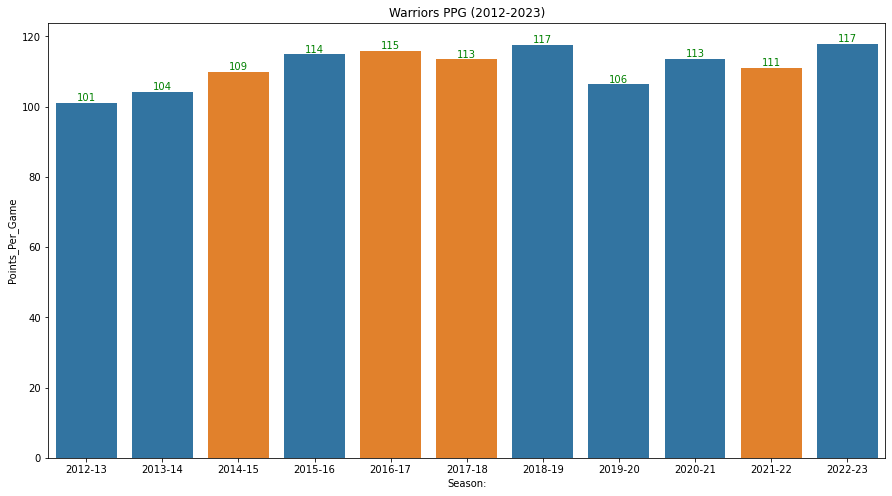

In [98]:
# warriors_overall.head(13)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,8))

sns.barplot(data = warriors_overall, x = 'Season:', y = 'Points_Per_Game', palette=['tab:blue', 'tab:blue', 'tab:orange', 'tab:blue', 
                                                                                    'tab:orange', 'tab:orange', 'tab:blue', 'tab:blue',
                                                                                    'tab:blue', 'tab:orange', 'tab:blue']).set(title = 'Warriors PPG (2012-2023)')

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color = 'green', ha='center', va='bottom')

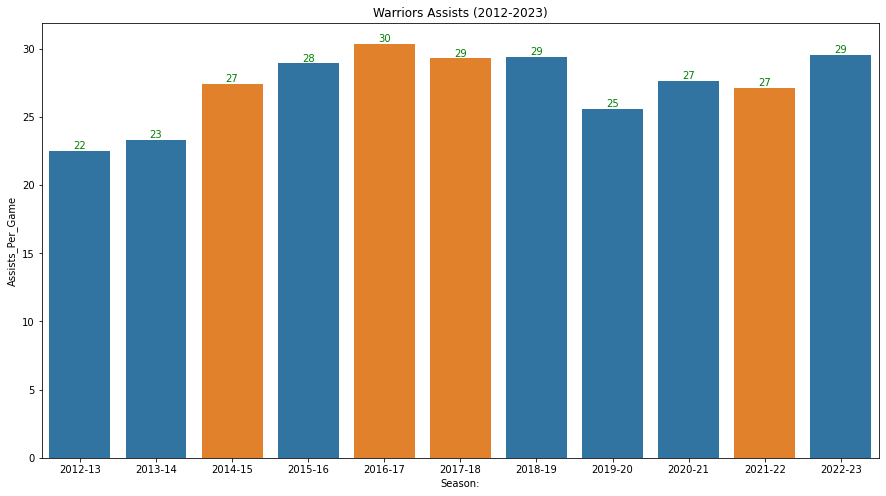

In [99]:
plt.figure(figsize = (15,8))

sns.barplot(data = warriors_overall, x = 'Season:', y = 'Assists_Per_Game', palette=['tab:blue', 'tab:blue', 'tab:orange', 'tab:blue', 
                                                                                    'tab:orange', 'tab:orange', 'tab:blue', 'tab:blue',
                                                                                    'tab:blue', 'tab:orange', 'tab:blue']).set(title = 'Warriors Assists (2012-2023)')

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color = 'green', ha='center', va='bottom')

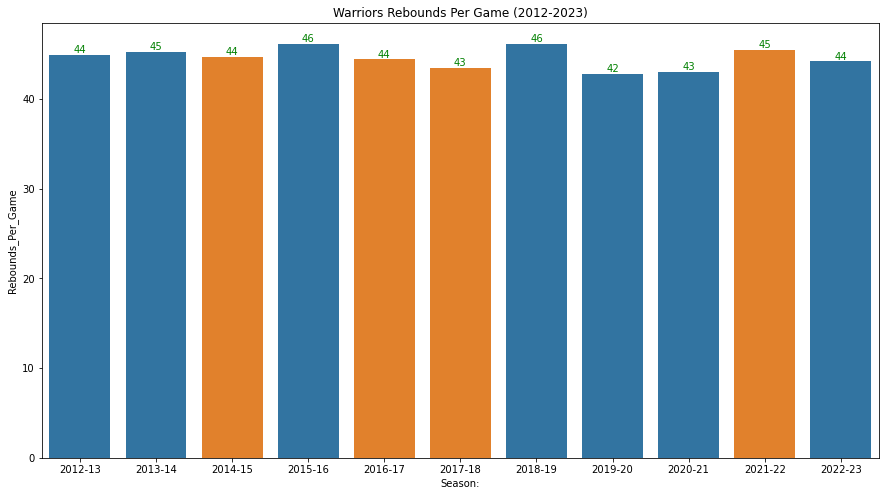

In [103]:
plt.figure(figsize = (15,8))

sns.barplot(data = warriors_overall, x = 'Season:', y = 'Rebounds_Per_Game', palette=['tab:blue', 'tab:blue', 'tab:orange', 'tab:blue', 
                                                                                    'tab:orange', 'tab:orange', 'tab:blue', 'tab:blue',
                                                                                    'tab:blue', 'tab:orange', 'tab:blue']).set(title = 'Warriors Rebounds Per Game (2012-2023)')

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color = 'green', ha='center', va='bottom')

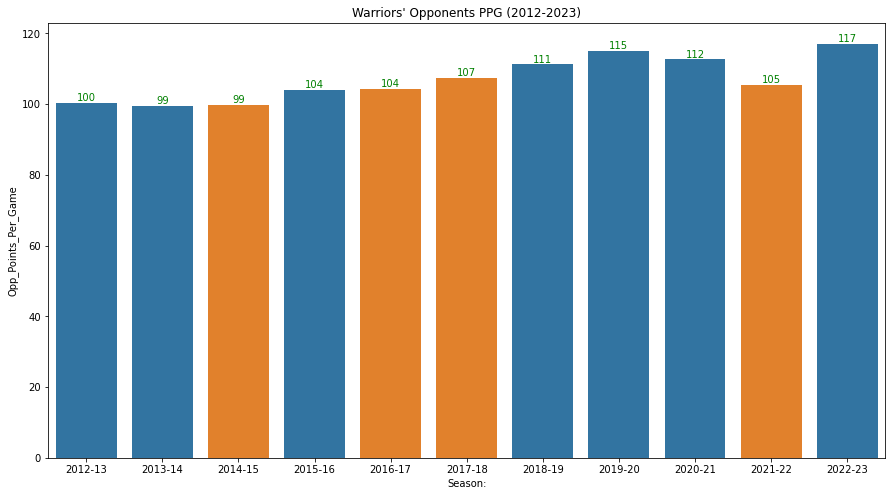

In [101]:
plt.figure(figsize = (15,8))

sns.barplot(data = warriors_overall, x = 'Season:', y = 'Opp_Points_Per_Game', palette=['tab:blue', 'tab:blue', 'tab:orange', 'tab:blue', 
                                                                                    'tab:orange', 'tab:orange', 'tab:blue', 'tab:blue',
                                                                                    'tab:blue', 'tab:orange', 'tab:blue']).set(title = 'Warriors\' Opponents PPG (2012-2023)')

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color = 'green', ha='center', va='bottom')

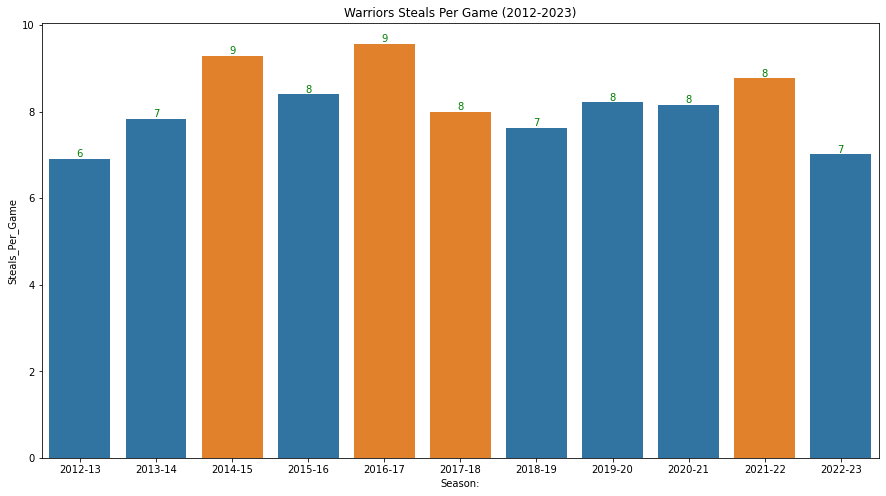

In [104]:
plt.figure(figsize = (15,8))

sns.barplot(data = warriors_overall, x = 'Season:', y = 'Steals_Per_Game', palette=['tab:blue', 'tab:blue', 'tab:orange', 'tab:blue', 
                                                                                    'tab:orange', 'tab:orange', 'tab:blue', 'tab:blue',
                                                                                    'tab:blue', 'tab:orange', 'tab:blue']).set(title = 'Warriors Steals Per Game (2012-2023)')

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color = 'green', ha='center', va='bottom')

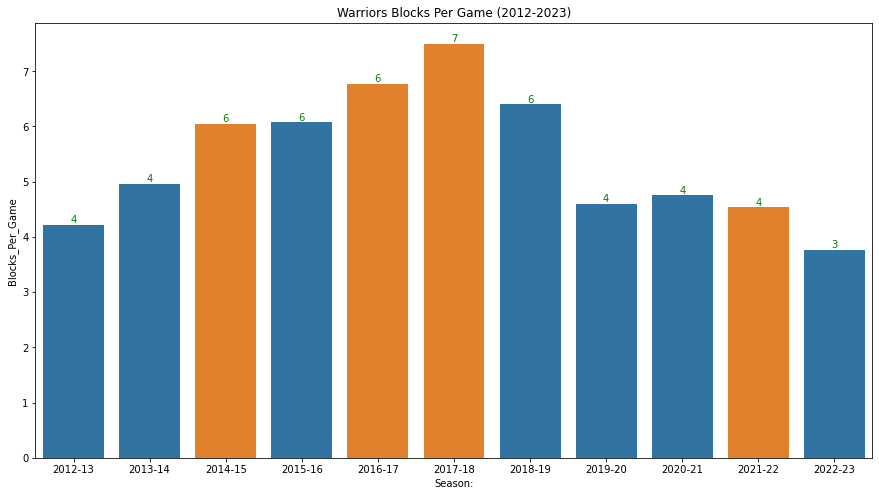

In [105]:
plt.figure(figsize = (15,8))

sns.barplot(data = warriors_overall, x = 'Season:', y = 'Blocks_Per_Game', palette=['tab:blue', 'tab:blue', 'tab:orange', 'tab:blue', 
                                                                                    'tab:orange', 'tab:orange', 'tab:blue', 'tab:blue',
                                                                                    'tab:blue', 'tab:orange', 'tab:blue']).set(title = 'Warriors Blocks Per Game (2012-2023)')

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color = 'green', ha='center', va='bottom')

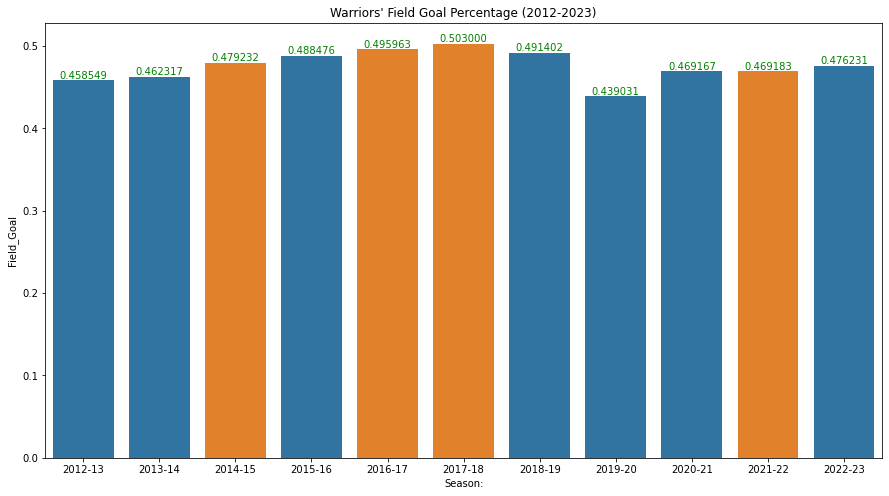

In [107]:
plt.figure(figsize = (15,8))

sns.barplot(data = warriors_overall, x = 'Season:', y = 'Field_Goal', palette=['tab:blue', 'tab:blue', 'tab:orange', 'tab:blue', 
                                                                                    'tab:orange', 'tab:orange', 'tab:blue', 'tab:blue',
                                                                                    'tab:blue', 'tab:orange', 'tab:blue']).set(title = 'Warriors\' Field Goal Percentage (2012-2023)')

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%f' % float(p.get_height()), color = 'green', ha='center', va='bottom')

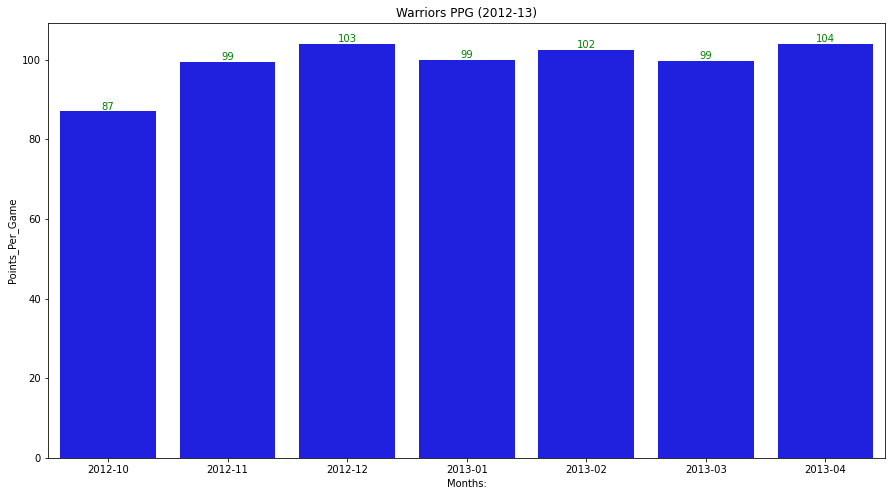

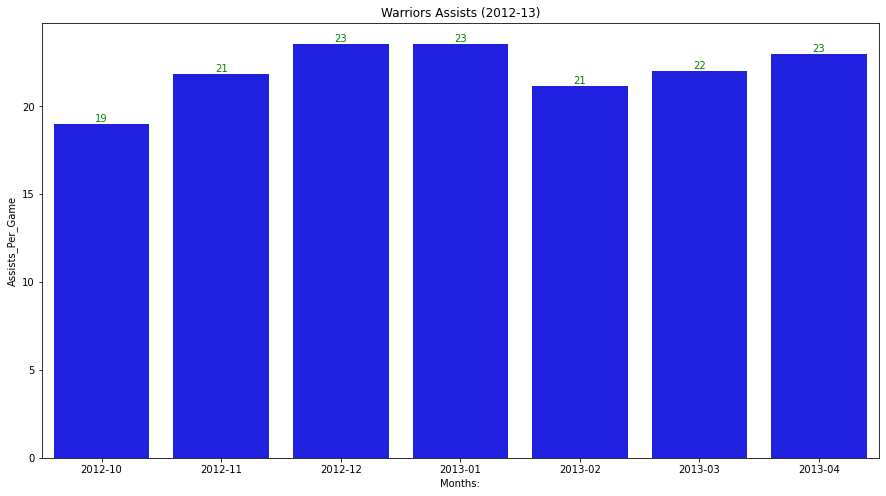

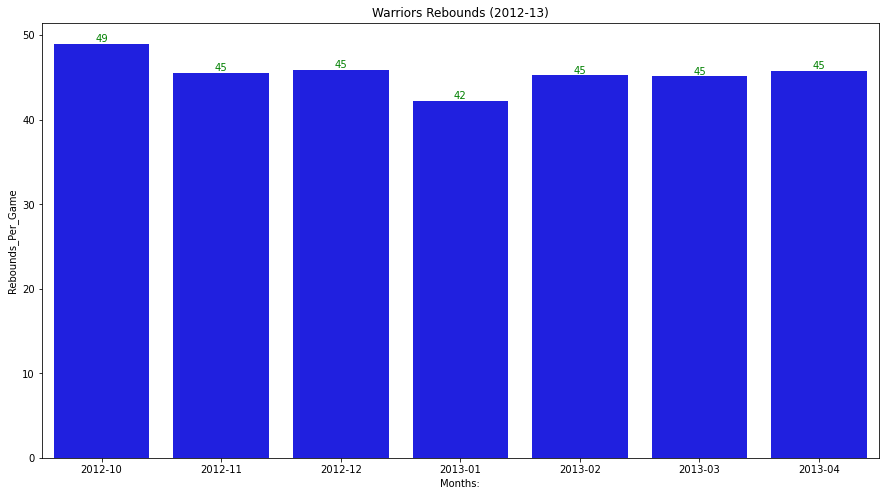

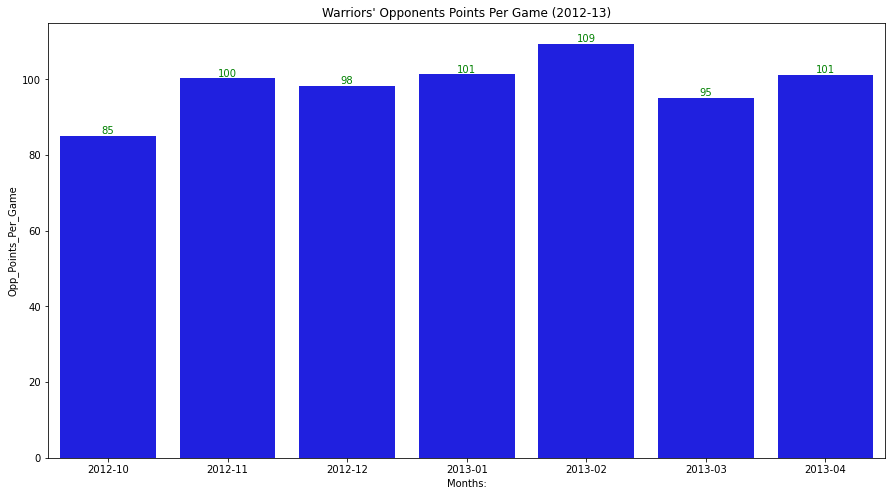

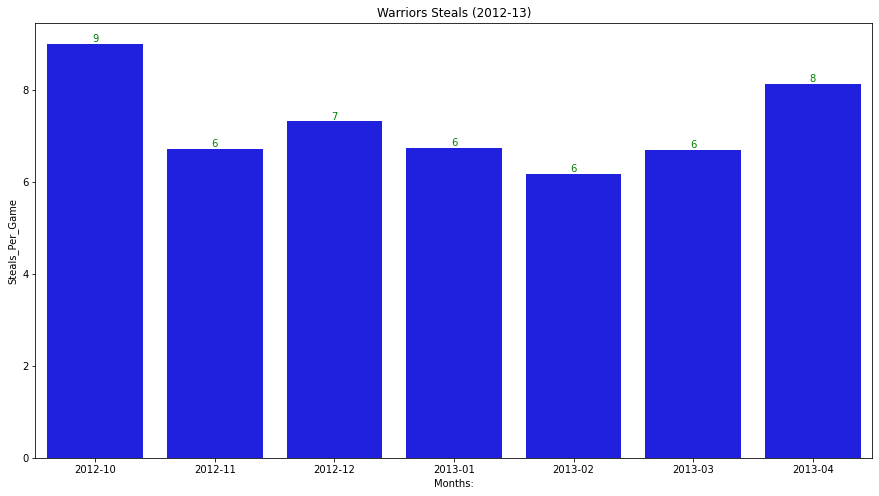

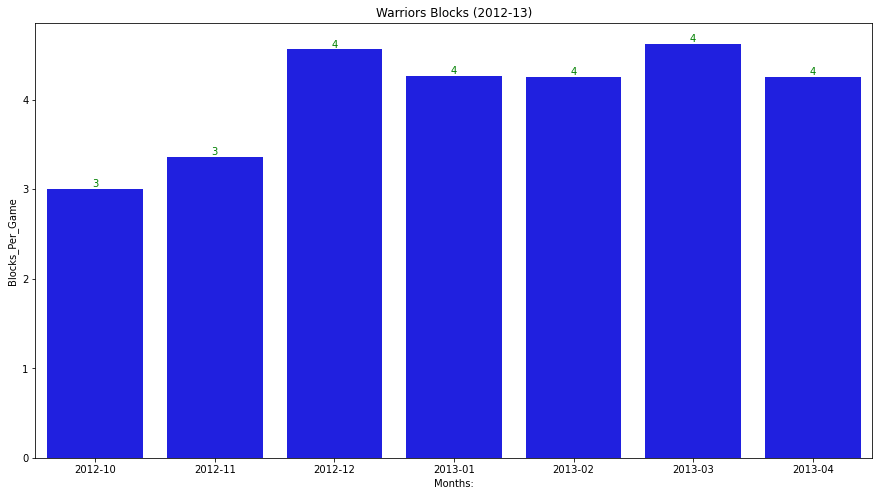

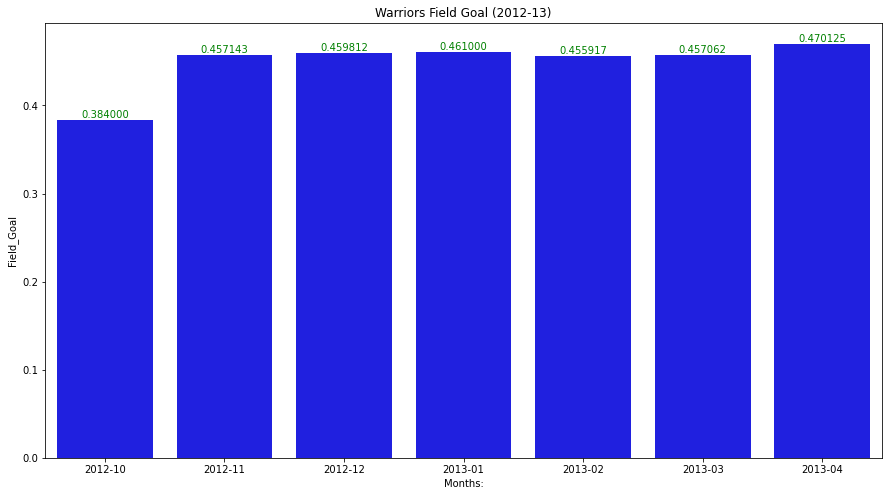

In [116]:
#warriors_12_13_overall.head()
plt.figure(figsize = (15,8))
sns.barplot(data = warriors_12_13_overall, x='Months:', y='Points_Per_Game', color='blue').set(title = 'Warriors PPG (2012-13)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color = 'green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_12_13_overall, x='Months:', y='Assists_Per_Game', color='blue').set(title='Warriors Assists (2012-13)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_12_13_overall, x='Months:', y='Rebounds_Per_Game', color='blue').set(title='Warriors Rebounds (2012-13)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_12_13_overall, x='Months:', y='Opp_Points_Per_Game', color='blue').set(title='Warriors\' Opponents Points Per Game (2012-13)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_12_13_overall, x='Months:', y='Steals_Per_Game', color='blue').set(title='Warriors Steals (2012-13)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_12_13_overall, x='Months:', y='Blocks_Per_Game', color='blue').set(title='Warriors Blocks (2012-13)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')
                                                                                           
plt.figure(figsize = (15,8))
sns.barplot(data = warriors_12_13_overall, x='Months:', y='Field_Goal', color='blue').set(title='Warriors Field Goal (2012-13)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%f' % float(p.get_height()), color='green', ha='center', va='bottom')

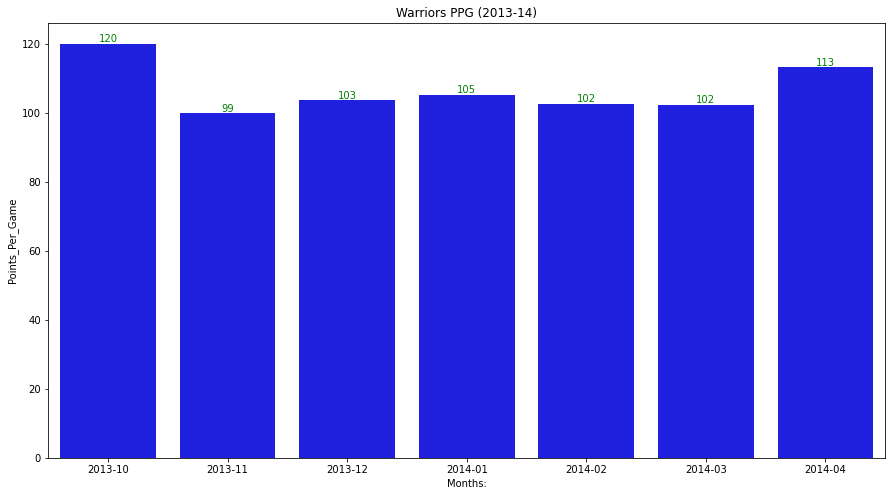

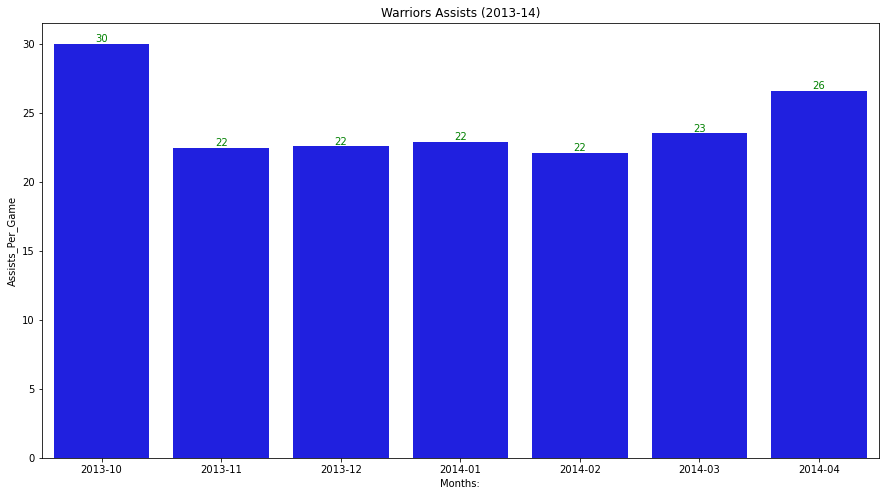

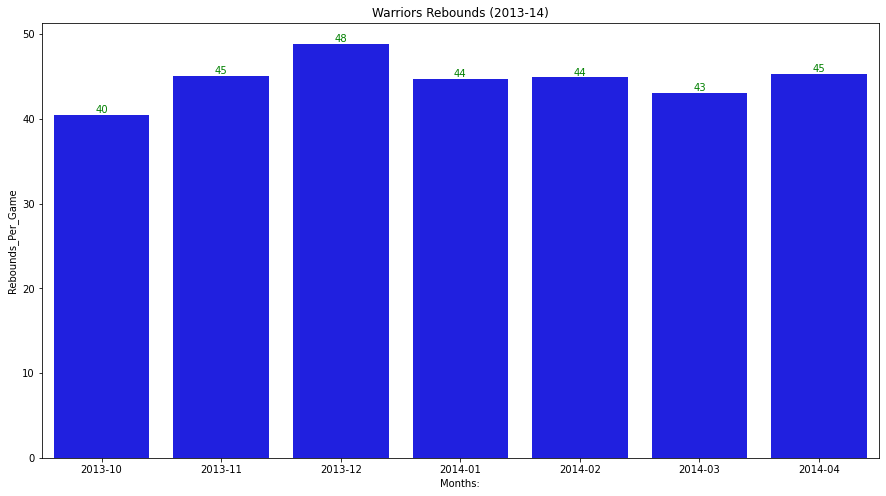

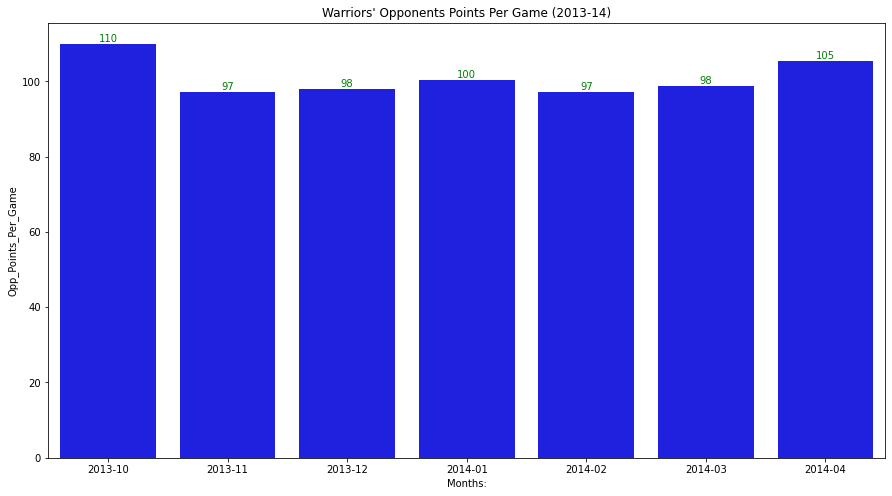

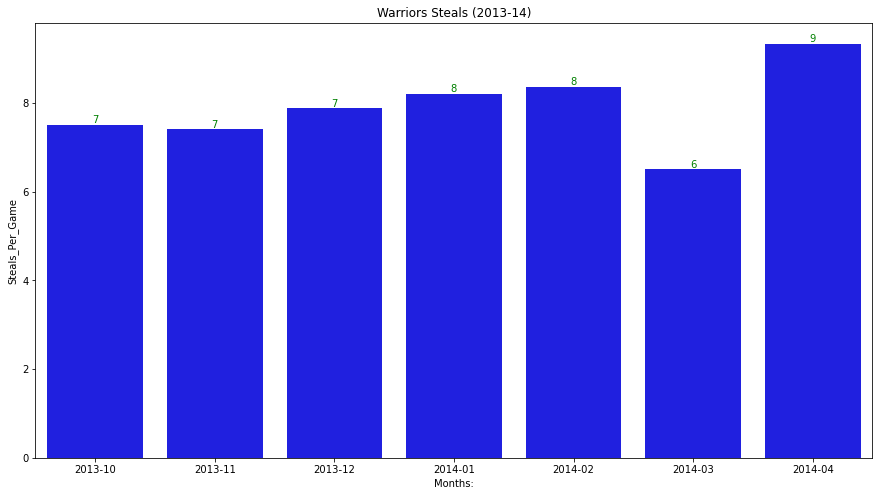

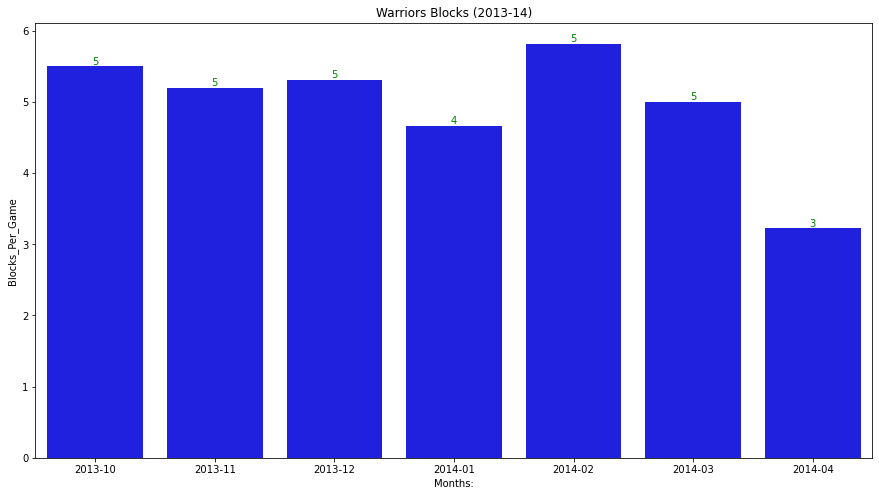

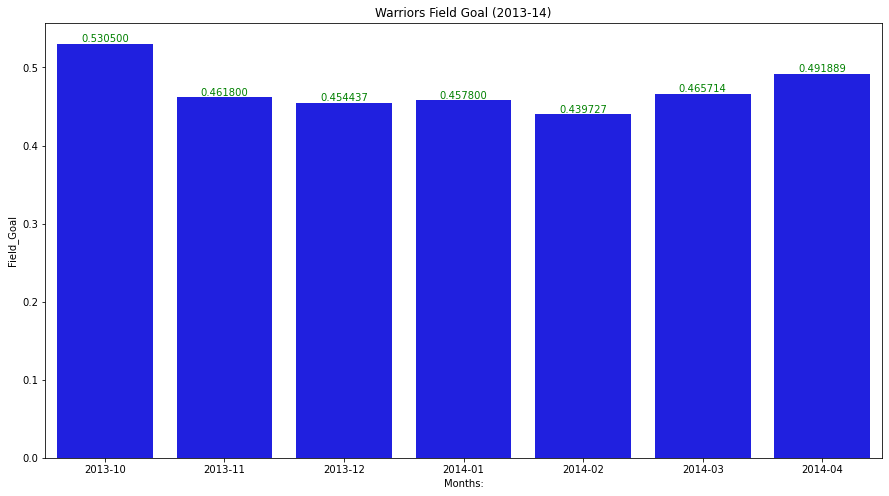

In [117]:
#warriors_12_13_overall.head()
plt.figure(figsize = (15,8))
sns.barplot(data = warriors_13_14_overall, x='Months:', y='Points_Per_Game', color='blue').set(title = 'Warriors PPG (2013-14)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color = 'green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_13_14_overall, x='Months:', y='Assists_Per_Game', color='blue').set(title='Warriors Assists (2013-14)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_13_14_overall, x='Months:', y='Rebounds_Per_Game', color='blue').set(title='Warriors Rebounds (2013-14)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_13_14_overall, x='Months:', y='Opp_Points_Per_Game', color='blue').set(title='Warriors\' Opponents Points Per Game (2013-14)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_13_14_overall, x='Months:', y='Steals_Per_Game', color='blue').set(title='Warriors Steals (2013-14)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_13_14_overall, x='Months:', y='Blocks_Per_Game', color='blue').set(title='Warriors Blocks (2013-14)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')
                                                                                           
plt.figure(figsize = (15,8))
sns.barplot(data = warriors_13_14_overall, x='Months:', y='Field_Goal', color='blue').set(title='Warriors Field Goal (2013-14)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%f' % float(p.get_height()), color='green', ha='center', va='bottom')

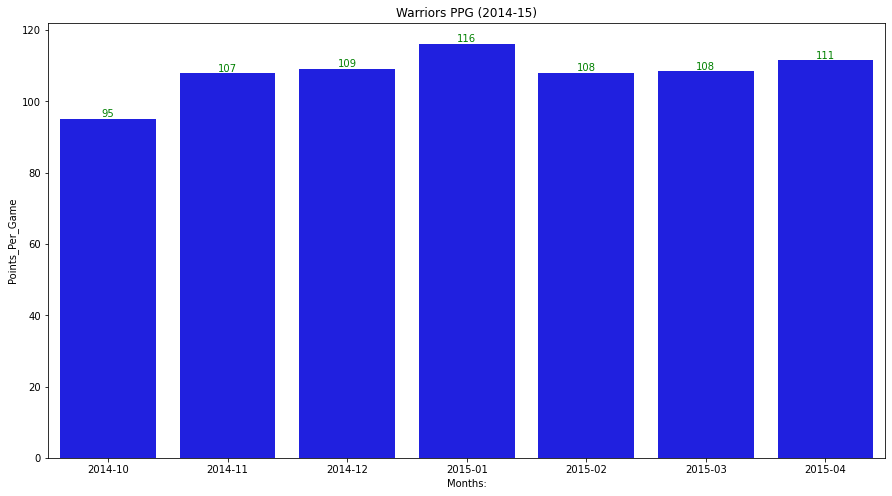

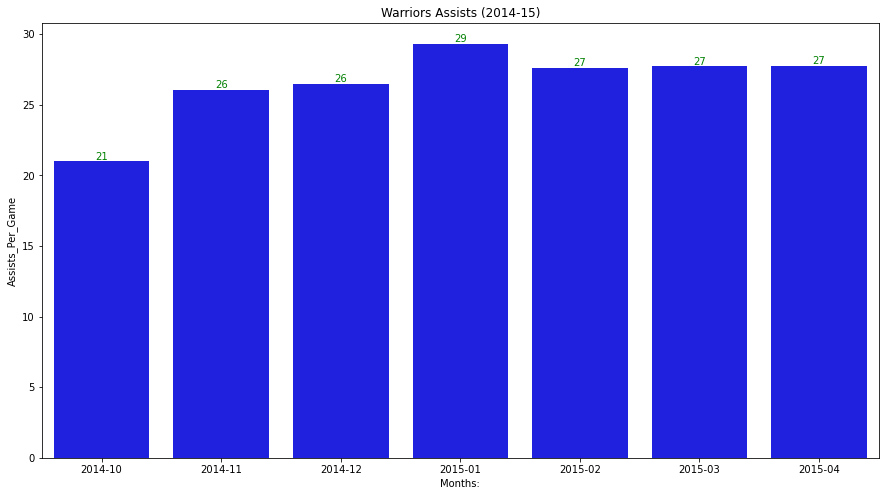

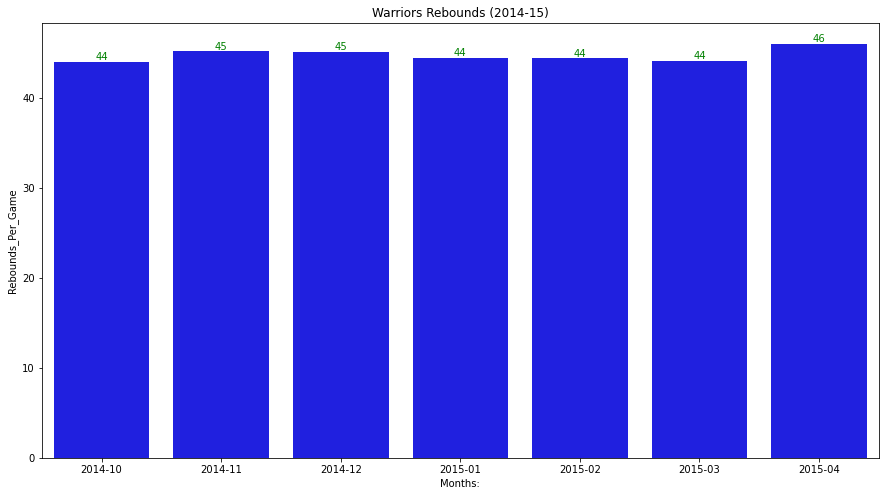

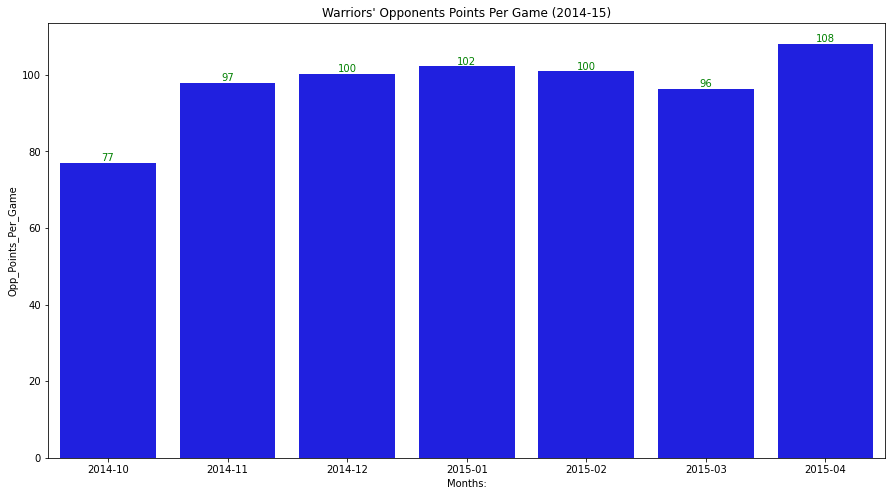

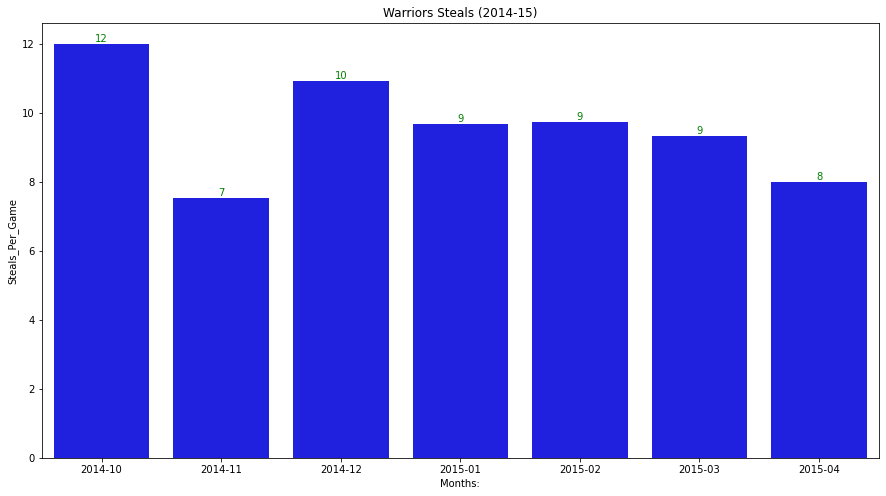

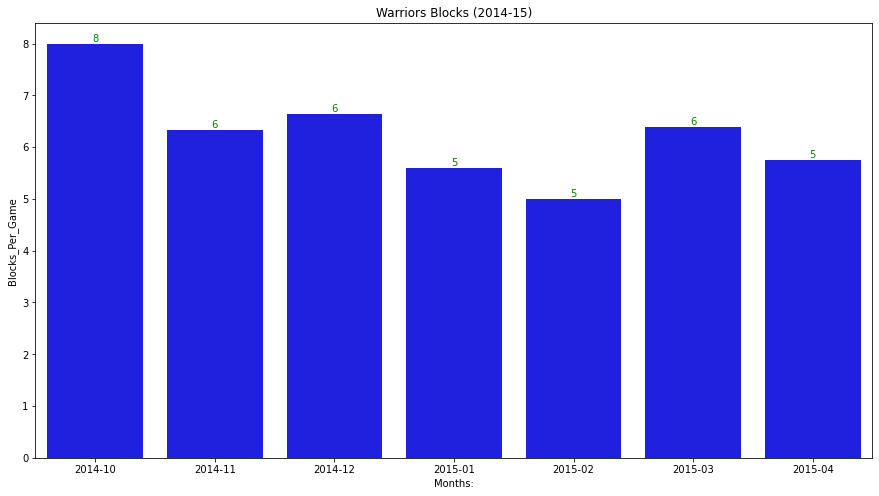

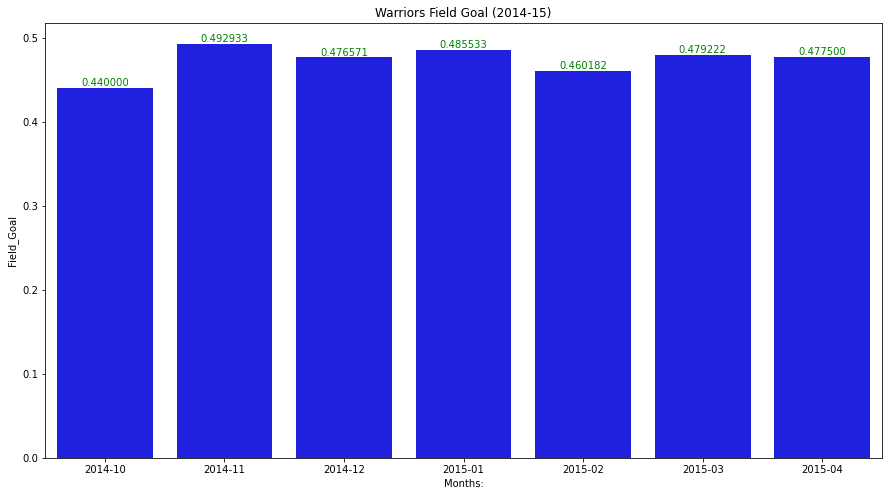

In [118]:
#warriors_12_13_overall.head()
plt.figure(figsize = (15,8))
sns.barplot(data = warriors_14_15_overall, x='Months:', y='Points_Per_Game', color='blue').set(title = 'Warriors PPG (2014-15)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color = 'green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_14_15_overall, x='Months:', y='Assists_Per_Game', color='blue').set(title='Warriors Assists (2014-15)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_14_15_overall, x='Months:', y='Rebounds_Per_Game', color='blue').set(title='Warriors Rebounds (2014-15)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_14_15_overall, x='Months:', y='Opp_Points_Per_Game', color='blue').set(title='Warriors\' Opponents Points Per Game (2014-15)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_14_15_overall, x='Months:', y='Steals_Per_Game', color='blue').set(title='Warriors Steals (2014-15)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_14_15_overall, x='Months:', y='Blocks_Per_Game', color='blue').set(title='Warriors Blocks (2014-15)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')
                                                                                           
plt.figure(figsize = (15,8))
sns.barplot(data = warriors_14_15_overall, x='Months:', y='Field_Goal', color='blue').set(title='Warriors Field Goal (2014-15)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%f' % float(p.get_height()), color='green', ha='center', va='bottom')

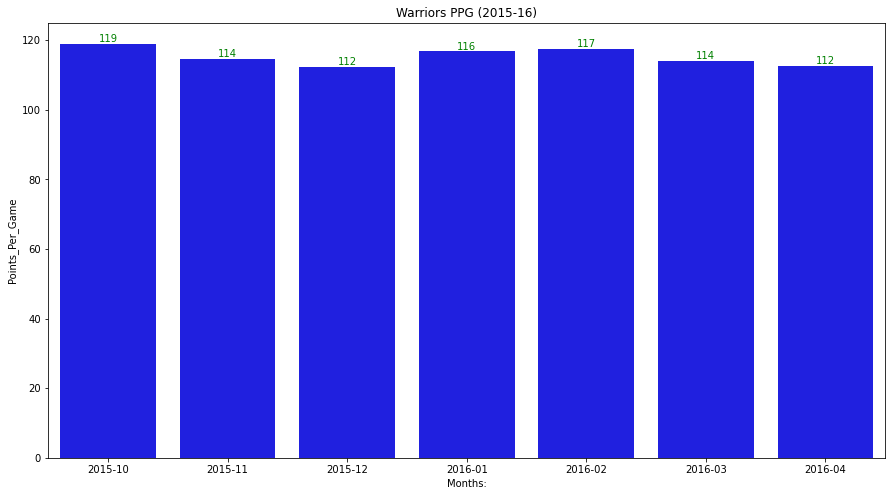

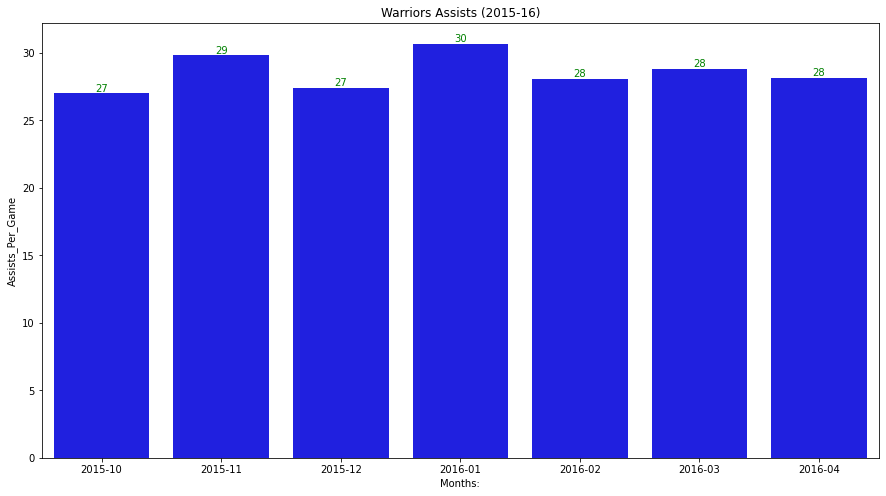

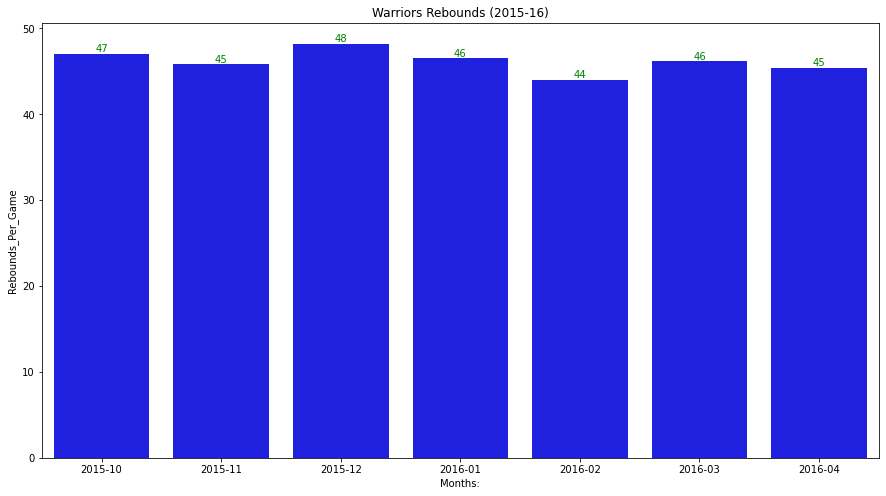

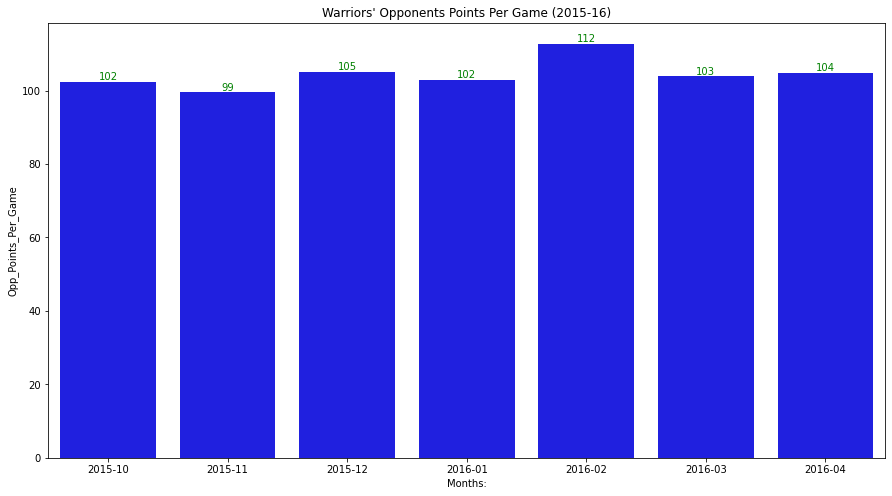

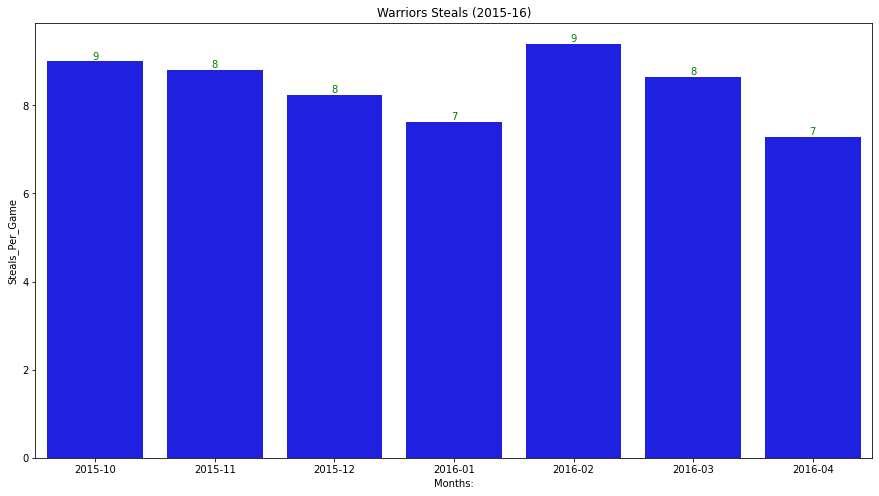

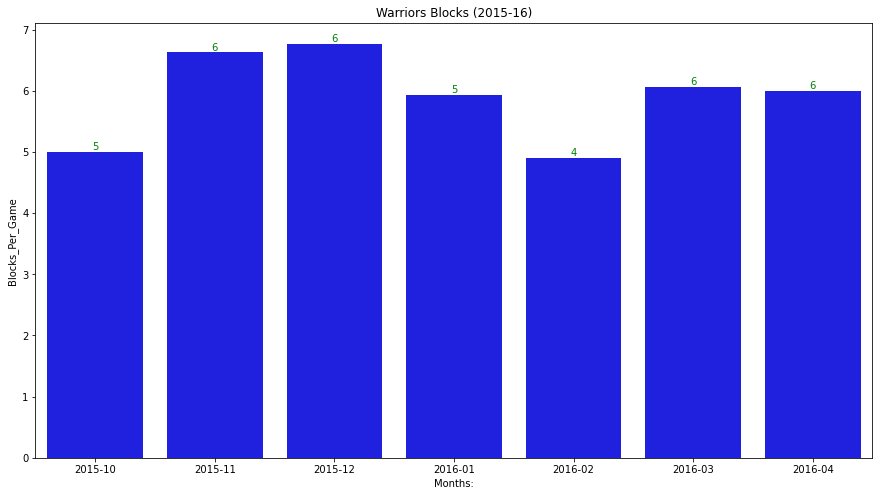

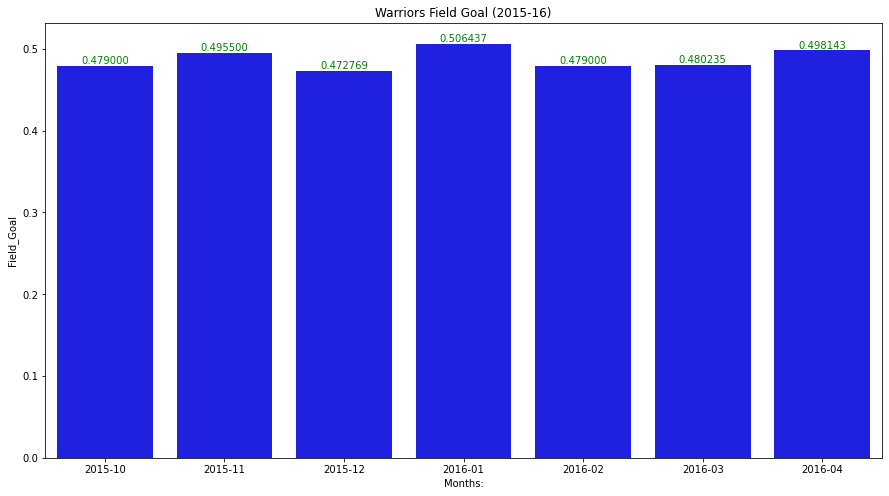

In [119]:
#warriors_12_13_overall.head()
plt.figure(figsize = (15,8))
sns.barplot(data = warriors_15_16_overall, x='Months:', y='Points_Per_Game', color='blue').set(title = 'Warriors PPG (2015-16)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color = 'green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_15_16_overall, x='Months:', y='Assists_Per_Game', color='blue').set(title='Warriors Assists (2015-16)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_15_16_overall, x='Months:', y='Rebounds_Per_Game', color='blue').set(title='Warriors Rebounds (2015-16)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_15_16_overall, x='Months:', y='Opp_Points_Per_Game', color='blue').set(title='Warriors\' Opponents Points Per Game (2015-16)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_15_16_overall, x='Months:', y='Steals_Per_Game', color='blue').set(title='Warriors Steals (2015-16)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_15_16_overall, x='Months:', y='Blocks_Per_Game', color='blue').set(title='Warriors Blocks (2015-16)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')
                                                                                           
plt.figure(figsize = (15,8))
sns.barplot(data = warriors_15_16_overall, x='Months:', y='Field_Goal', color='blue').set(title='Warriors Field Goal (2015-16)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%f' % float(p.get_height()), color='green', ha='center', va='bottom')

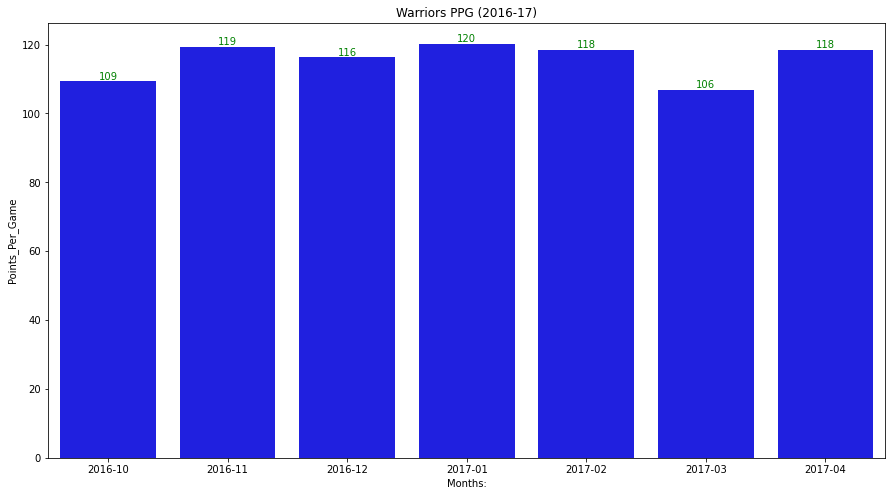

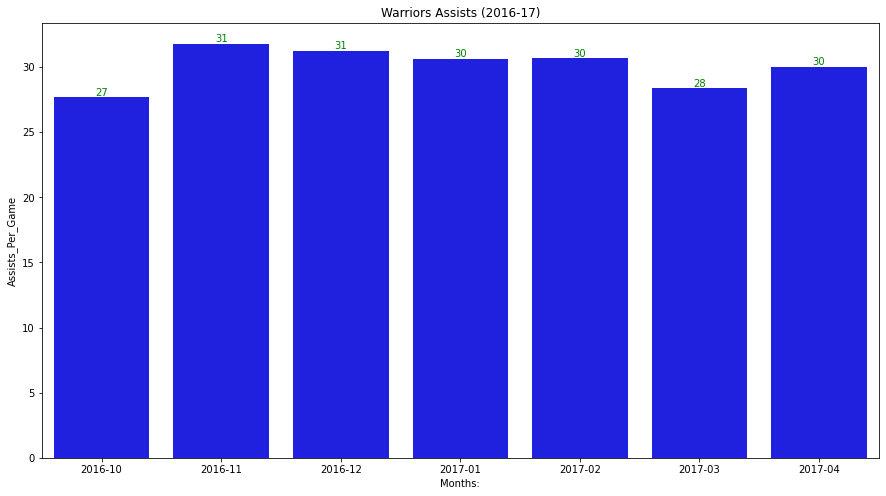

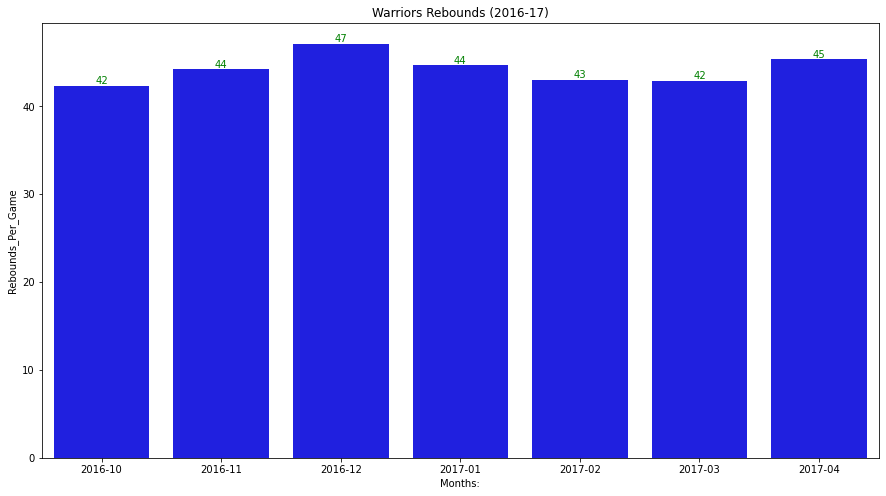

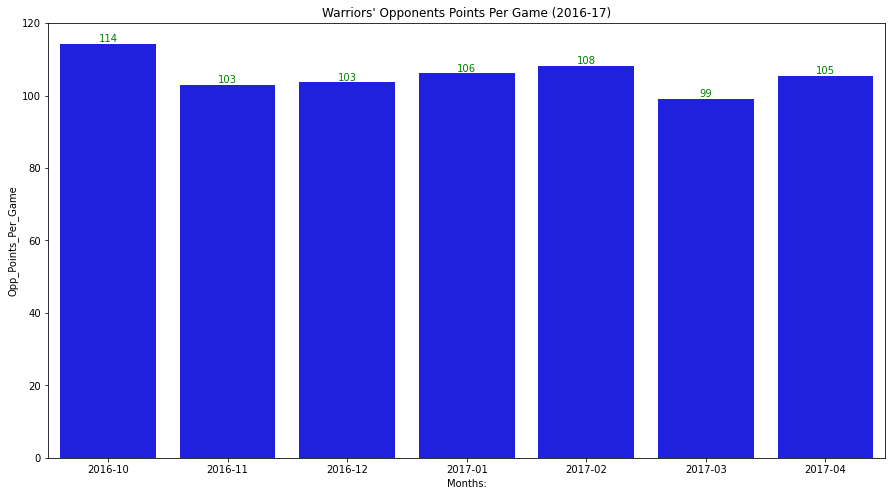

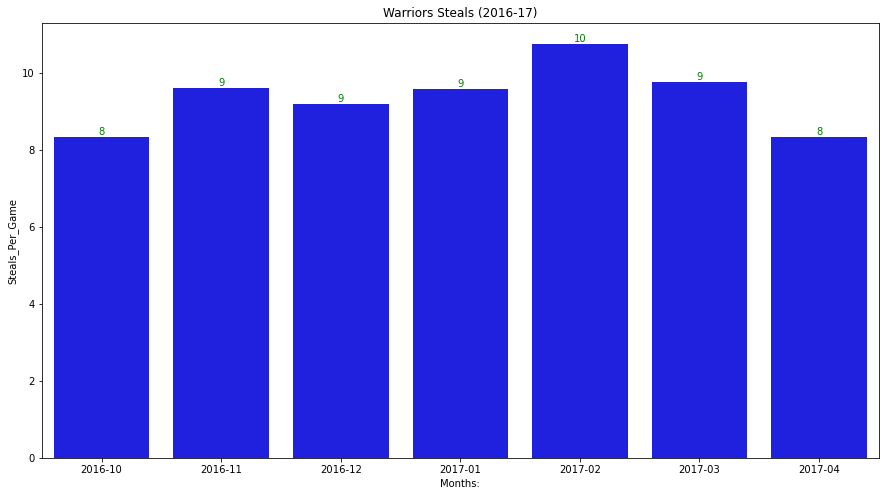

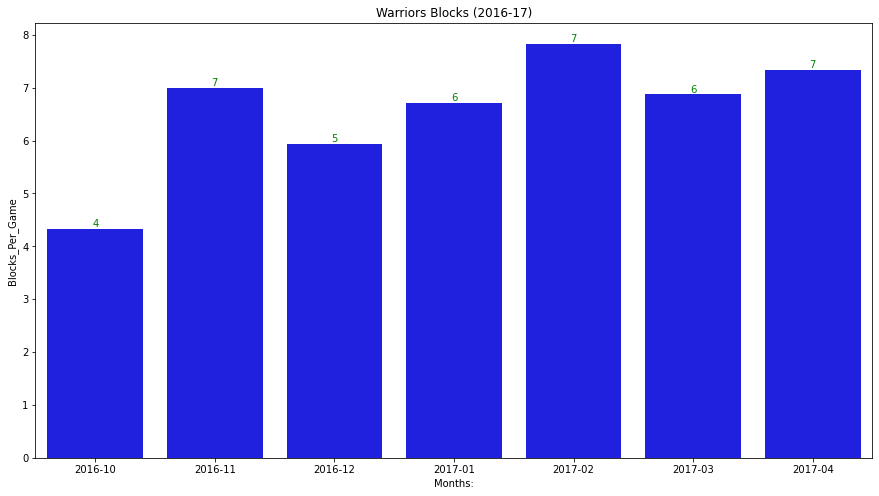

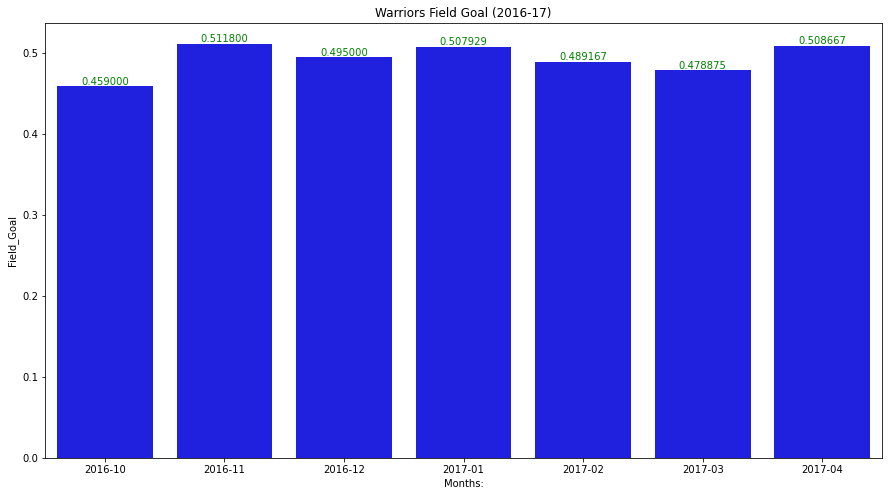

In [120]:
#warriors_12_13_overall.head()
plt.figure(figsize = (15,8))
sns.barplot(data = warriors_16_17_overall, x='Months:', y='Points_Per_Game', color='blue').set(title = 'Warriors PPG (2016-17)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color = 'green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_16_17_overall, x='Months:', y='Assists_Per_Game', color='blue').set(title='Warriors Assists (2016-17)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_16_17_overall, x='Months:', y='Rebounds_Per_Game', color='blue').set(title='Warriors Rebounds (2016-17)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_16_17_overall, x='Months:', y='Opp_Points_Per_Game', color='blue').set(title='Warriors\' Opponents Points Per Game (2016-17)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_16_17_overall, x='Months:', y='Steals_Per_Game', color='blue').set(title='Warriors Steals (2016-17)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_16_17_overall, x='Months:', y='Blocks_Per_Game', color='blue').set(title='Warriors Blocks (2016-17)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')
                                                                                           
plt.figure(figsize = (15,8))
sns.barplot(data = warriors_16_17_overall, x='Months:', y='Field_Goal', color='blue').set(title='Warriors Field Goal (2016-17)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%f' % float(p.get_height()), color='green', ha='center', va='bottom')

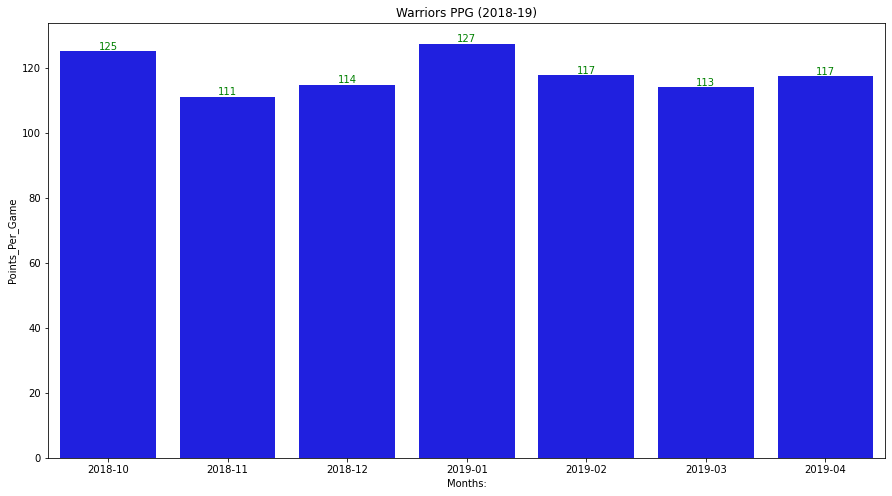

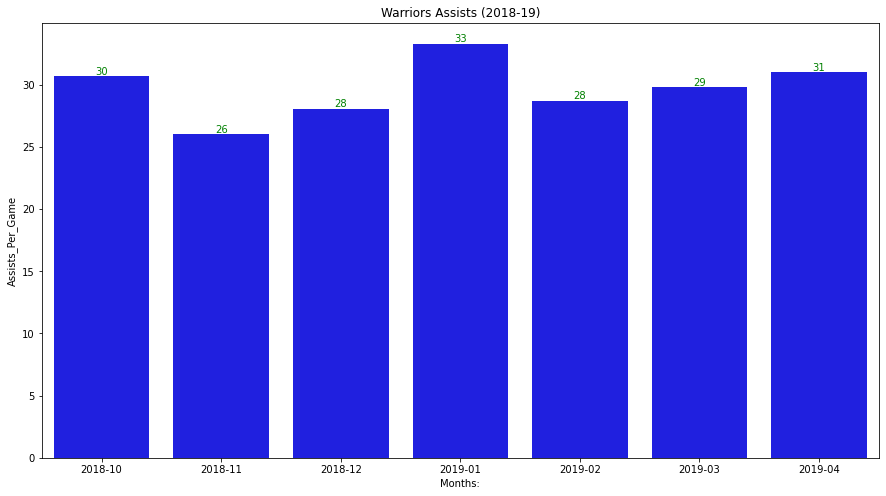

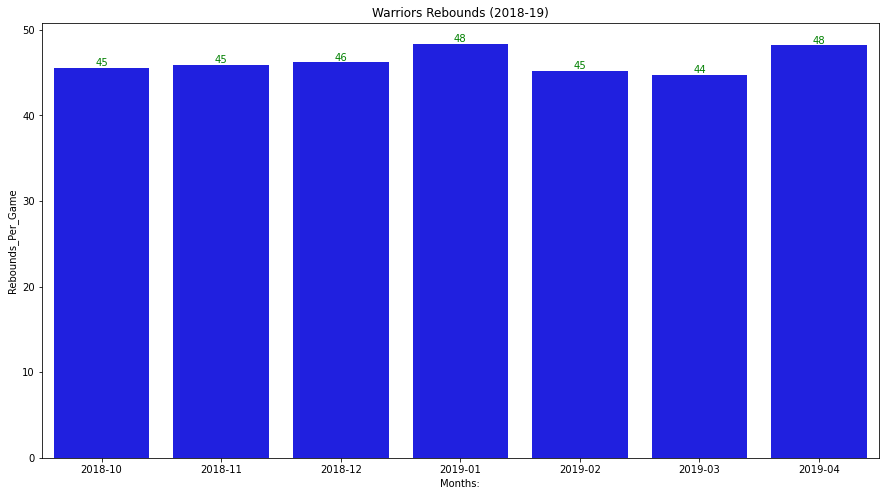

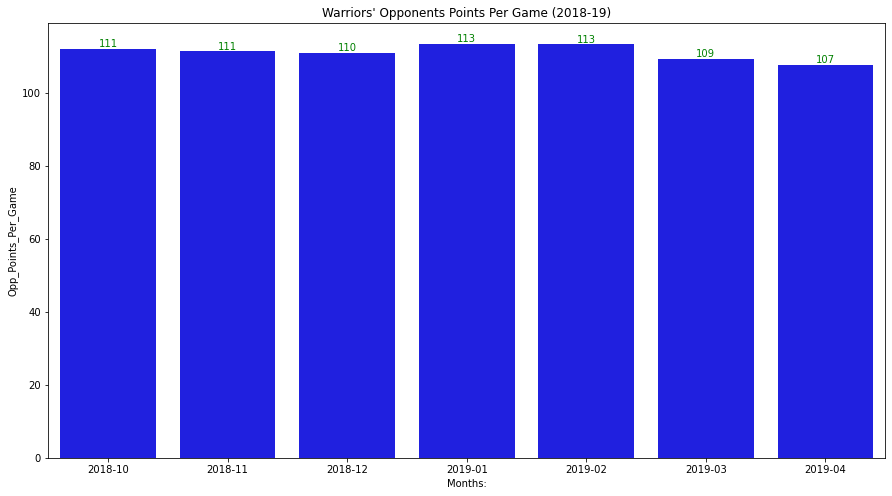

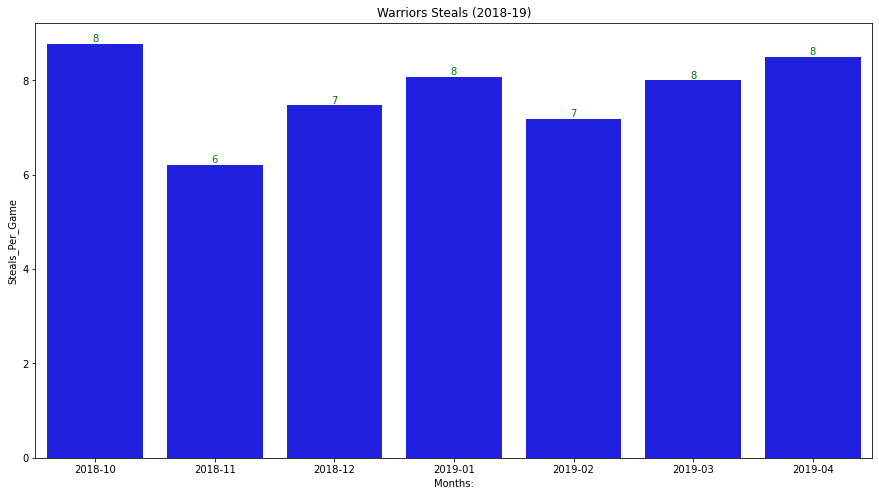

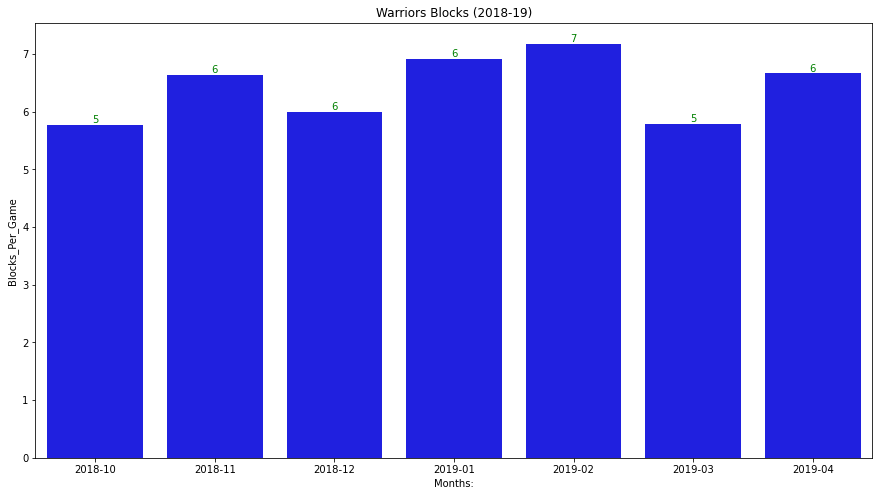

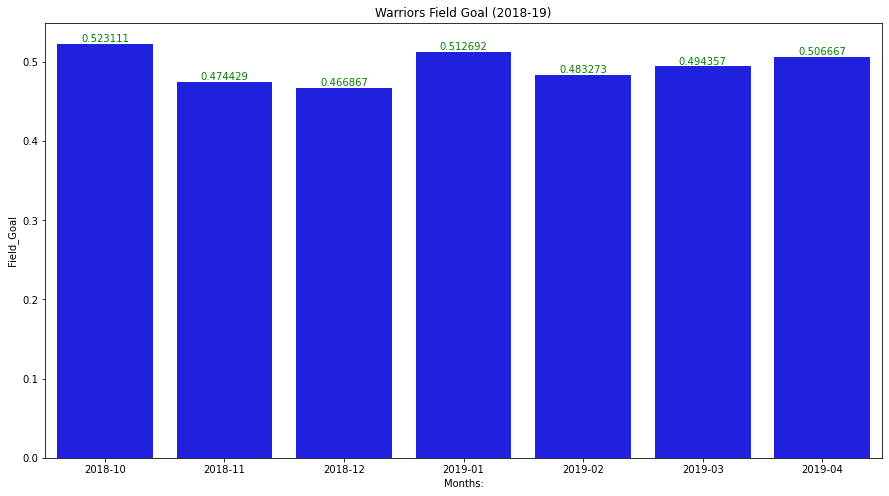

In [121]:
#warriors_12_13_overall.head()
plt.figure(figsize = (15,8))
sns.barplot(data = warriors_18_19_overall, x='Months:', y='Points_Per_Game', color='blue').set(title = 'Warriors PPG (2018-19)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color = 'green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_18_19_overall, x='Months:', y='Assists_Per_Game', color='blue').set(title='Warriors Assists (2018-19)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_18_19_overall, x='Months:', y='Rebounds_Per_Game', color='blue').set(title='Warriors Rebounds (2018-19)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_18_19_overall, x='Months:', y='Opp_Points_Per_Game', color='blue').set(title='Warriors\' Opponents Points Per Game (2018-19)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_18_19_overall, x='Months:', y='Steals_Per_Game', color='blue').set(title='Warriors Steals (2018-19)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_18_19_overall, x='Months:', y='Blocks_Per_Game', color='blue').set(title='Warriors Blocks (2018-19)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')
                                                                                           
plt.figure(figsize = (15,8))
sns.barplot(data = warriors_18_19_overall, x='Months:', y='Field_Goal', color='blue').set(title='Warriors Field Goal (2018-19)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%f' % float(p.get_height()), color='green', ha='center', va='bottom')

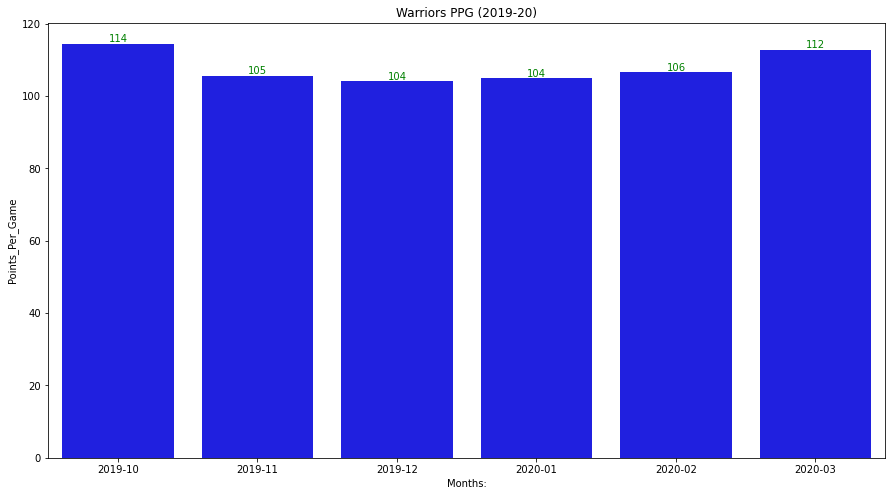

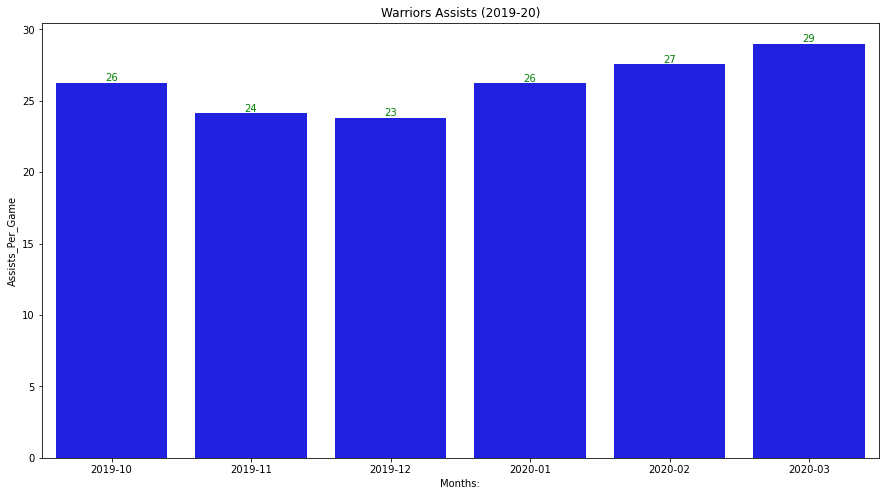

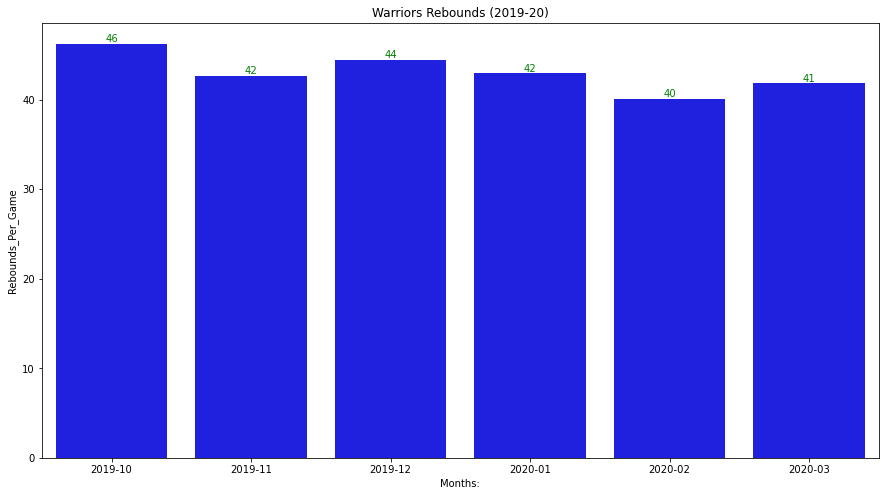

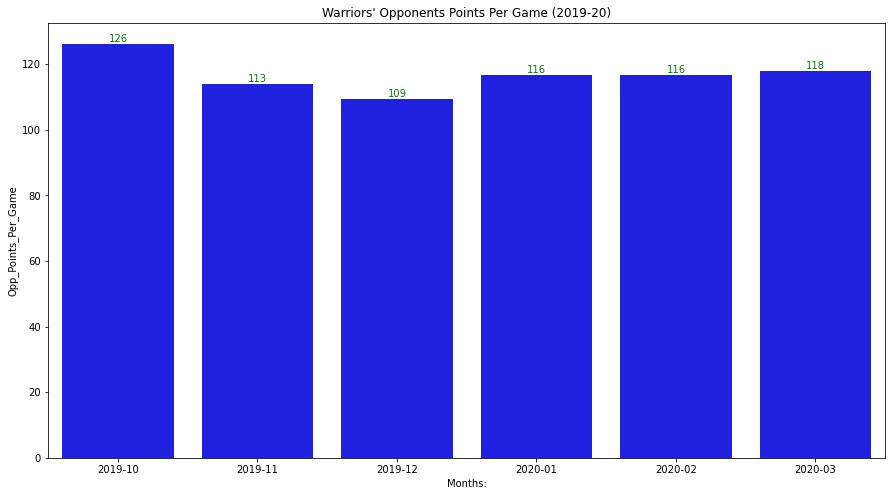

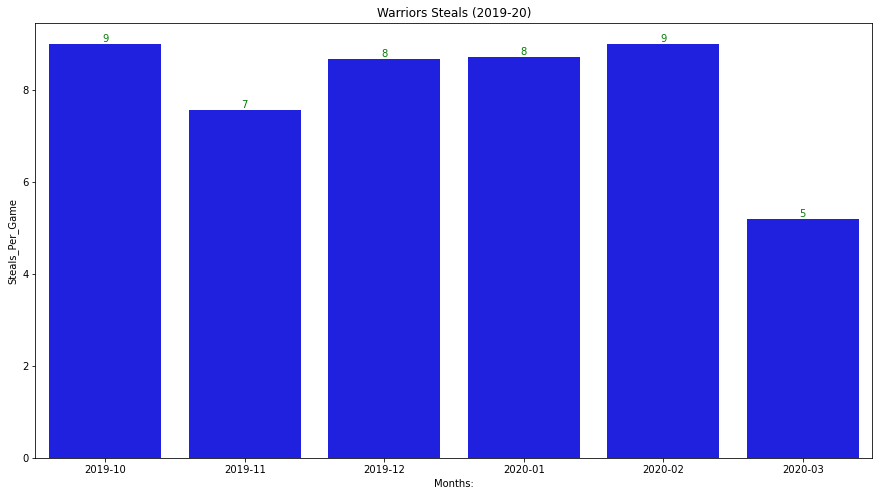

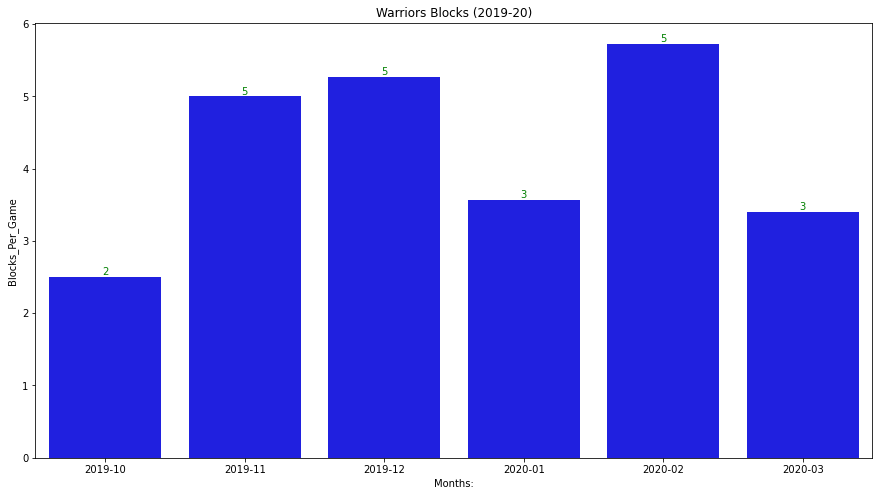

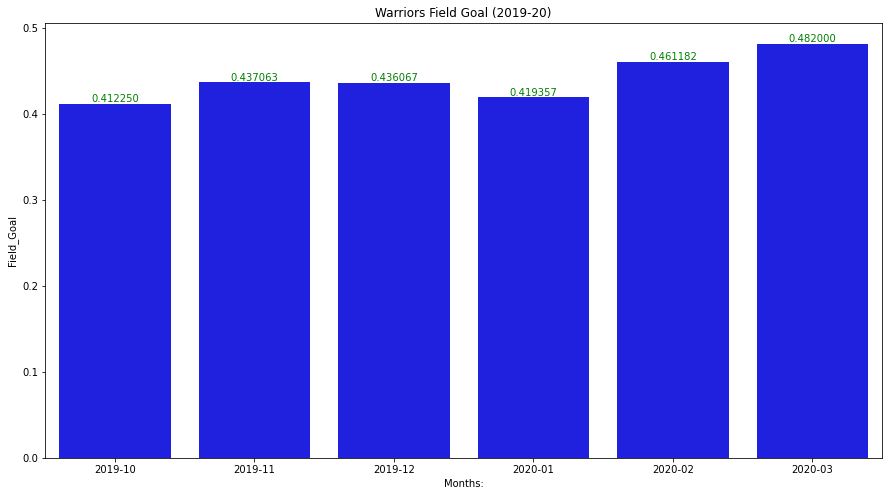

In [125]:
#warriors_12_13_overall.head()
plt.figure(figsize = (15,8))
sns.barplot(data = warriors_19_20_overall[0:6], x='Months:', y='Points_Per_Game', color='blue').set(title = 'Warriors PPG (2019-20)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color = 'green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_19_20_overall[0:6], x='Months:', y='Assists_Per_Game', color='blue').set(title='Warriors Assists (2019-20)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_19_20_overall[0:6], x='Months:', y='Rebounds_Per_Game', color='blue').set(title='Warriors Rebounds (2019-20)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_19_20_overall[0:6], x='Months:', y='Opp_Points_Per_Game', color='blue').set(title='Warriors\' Opponents Points Per Game (2019-20)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_19_20_overall[0:6], x='Months:', y='Steals_Per_Game', color='blue').set(title='Warriors Steals (2019-20)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_19_20_overall[0:6], x='Months:', y='Blocks_Per_Game', color='blue').set(title='Warriors Blocks (2019-20)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')
                                                                                           
plt.figure(figsize = (15,8))
sns.barplot(data = warriors_19_20_overall[0:6], x='Months:', y='Field_Goal', color='blue').set(title='Warriors Field Goal (2019-20)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%f' % float(p.get_height()), color='green', ha='center', va='bottom')

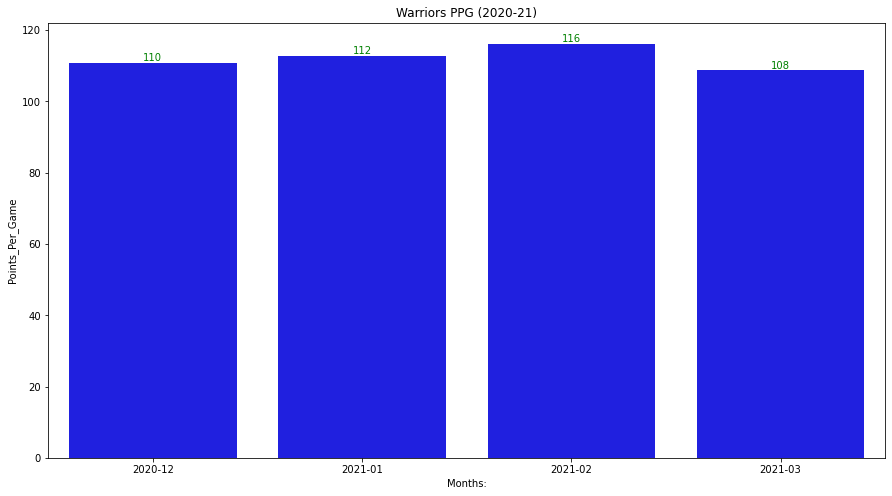

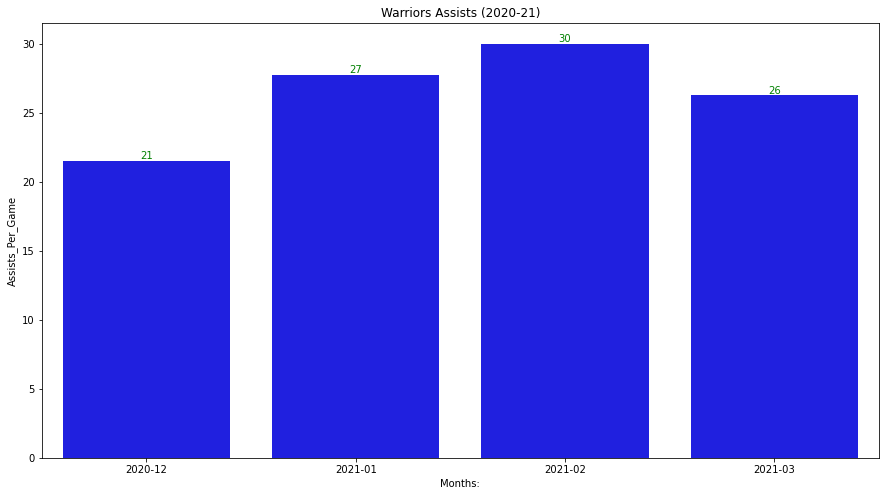

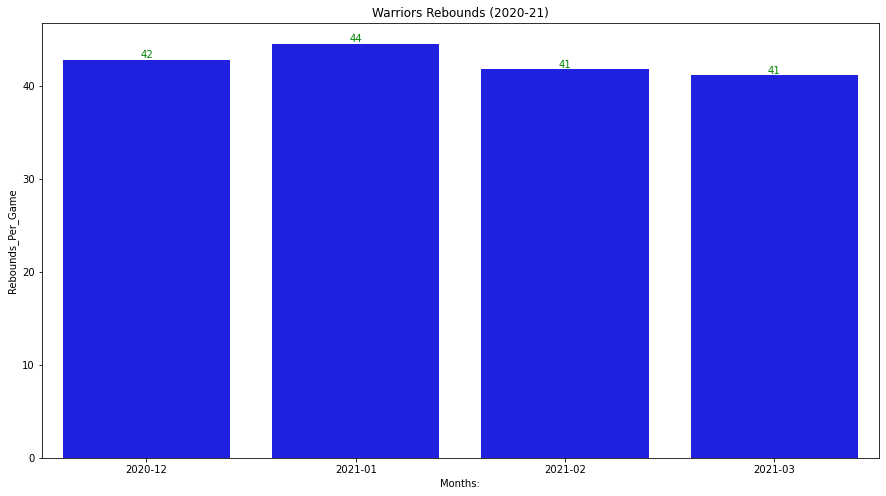

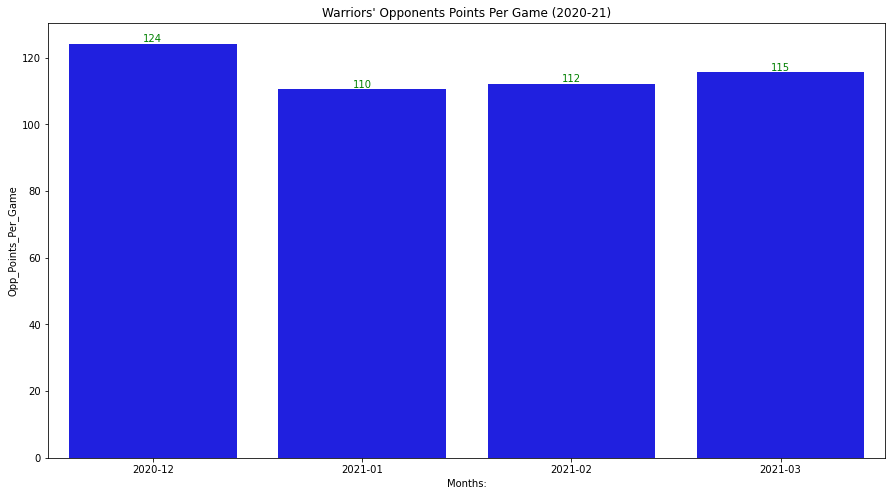

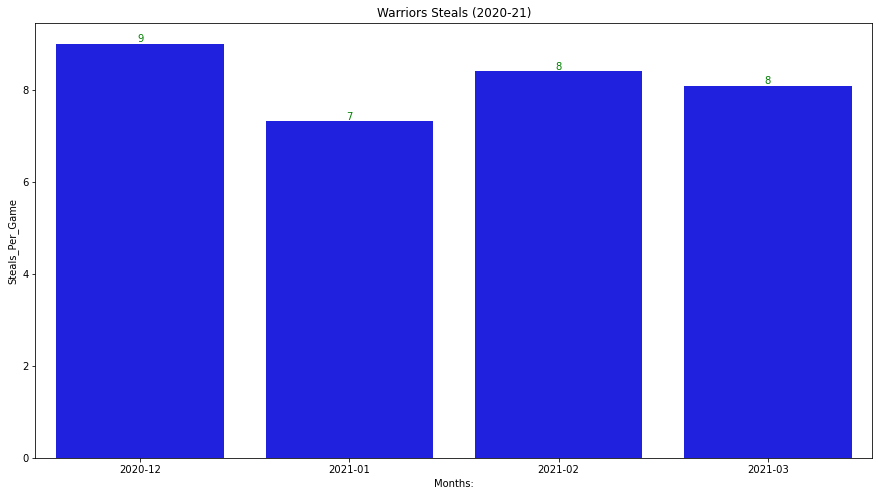

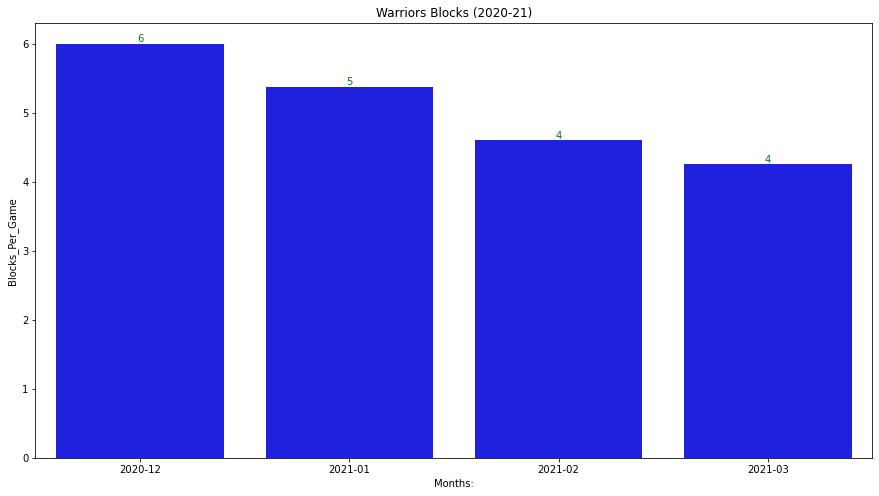

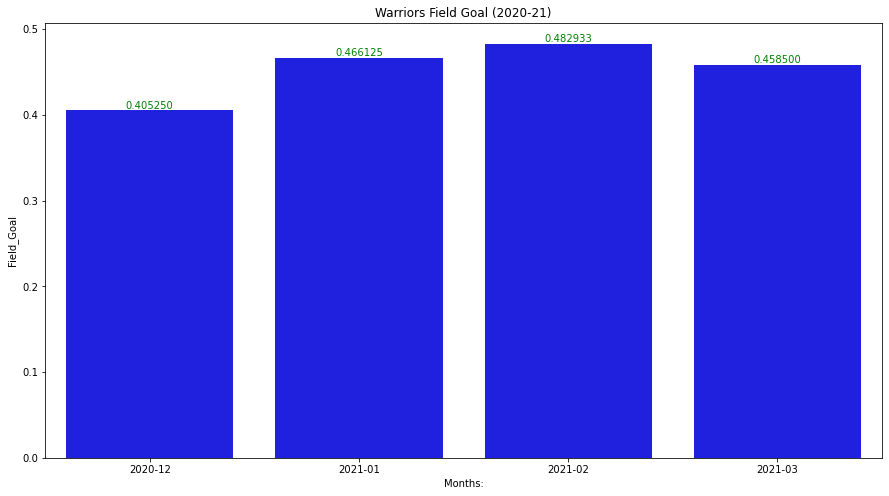

In [126]:
#warriors_12_13_overall.head()
plt.figure(figsize = (15,8))
sns.barplot(data = warriors_20_21_overall[2:6], x='Months:', y='Points_Per_Game', color='blue').set(title = 'Warriors PPG (2020-21)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color = 'green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_20_21_overall[2:6], x='Months:', y='Assists_Per_Game', color='blue').set(title='Warriors Assists (2020-21)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_20_21_overall[2:6], x='Months:', y='Rebounds_Per_Game', color='blue').set(title='Warriors Rebounds (2020-21)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_20_21_overall[2:6], x='Months:', y='Opp_Points_Per_Game', color='blue').set(title='Warriors\' Opponents Points Per Game (2020-21)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_20_21_overall[2:6], x='Months:', y='Steals_Per_Game', color='blue').set(title='Warriors Steals (2020-21)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_20_21_overall[2:6], x='Months:', y='Blocks_Per_Game', color='blue').set(title='Warriors Blocks (2020-21)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')
                                                                                           
plt.figure(figsize = (15,8))
sns.barplot(data = warriors_20_21_overall[2:6], x='Months:', y='Field_Goal', color='blue').set(title='Warriors Field Goal (2020-21)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%f' % float(p.get_height()), color='green', ha='center', va='bottom')

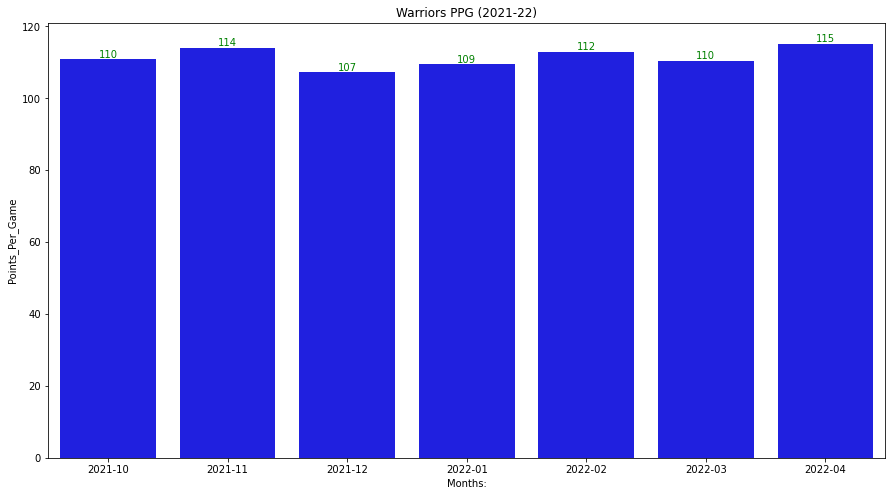

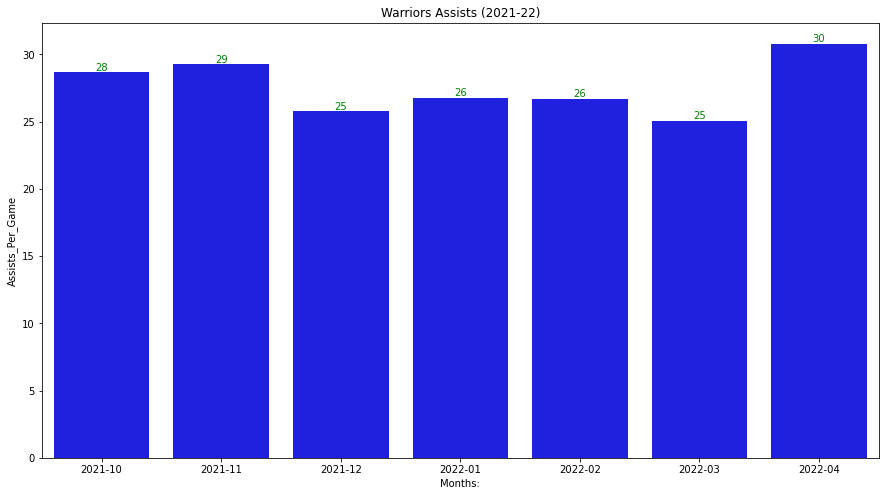

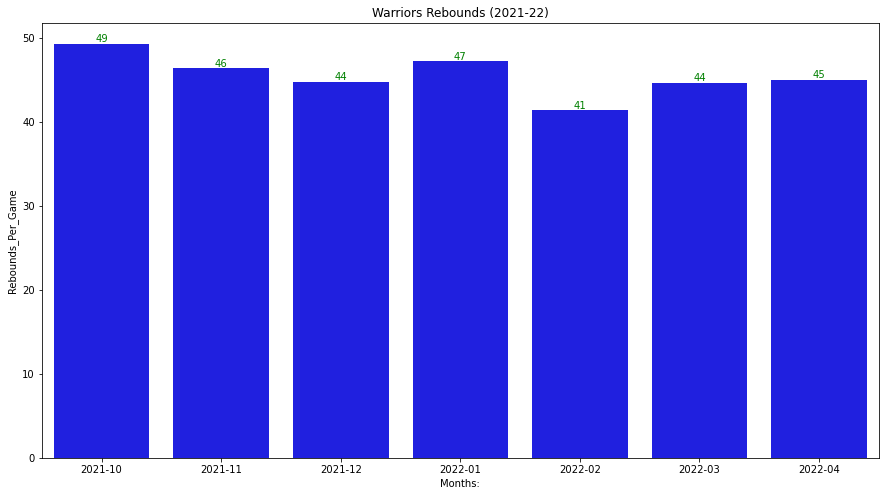

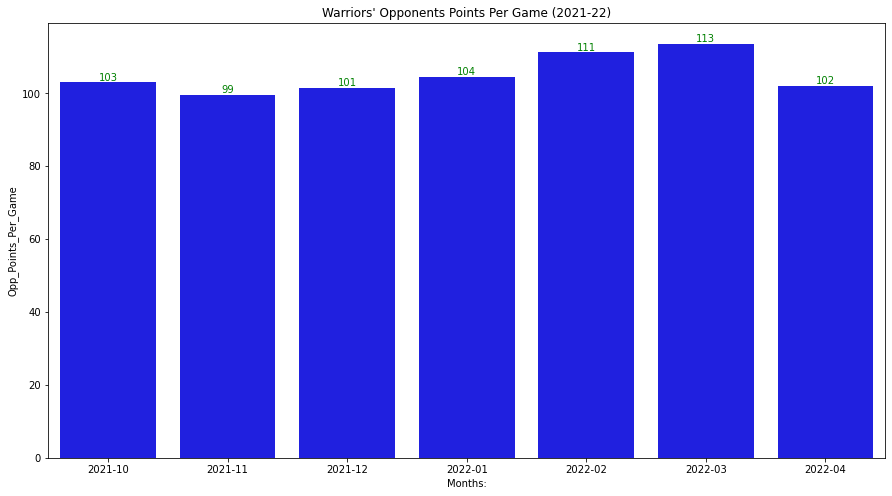

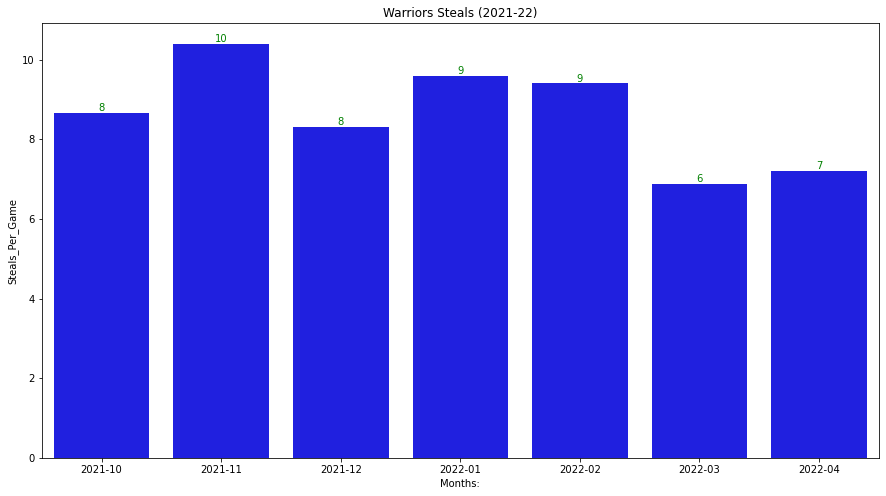

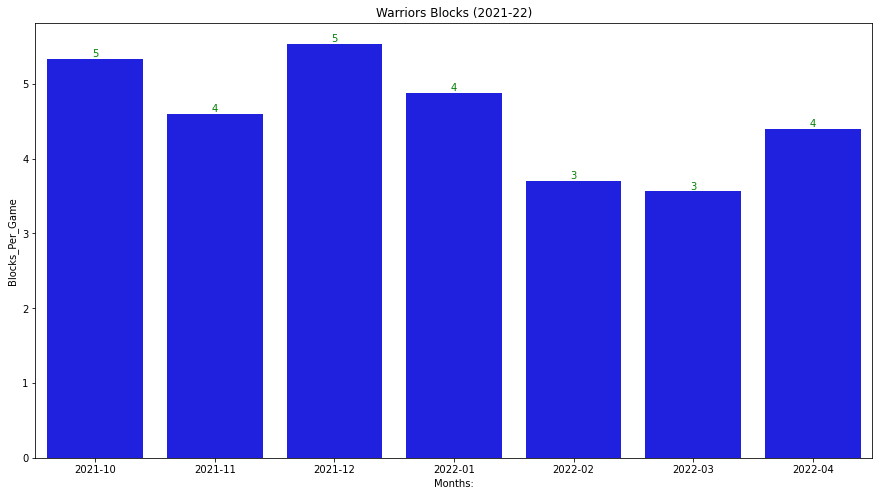

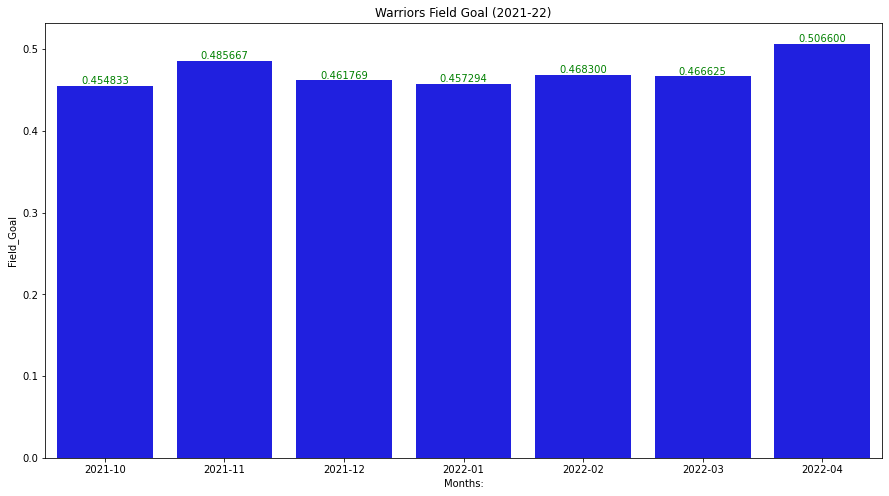

In [127]:
#warriors_12_13_overall.head()
plt.figure(figsize = (15,8))
sns.barplot(data = warriors_21_22_overall, x='Months:', y='Points_Per_Game', color='blue').set(title = 'Warriors PPG (2021-22)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color = 'green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_21_22_overall, x='Months:', y='Assists_Per_Game', color='blue').set(title='Warriors Assists (2021-22)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_21_22_overall, x='Months:', y='Rebounds_Per_Game', color='blue').set(title='Warriors Rebounds (2021-22)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_21_22_overall, x='Months:', y='Opp_Points_Per_Game', color='blue').set(title='Warriors\' Opponents Points Per Game (2021-22)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_21_22_overall, x='Months:', y='Steals_Per_Game', color='blue').set(title='Warriors Steals (2021-22)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')

plt.figure(figsize = (15,8))
sns.barplot(data = warriors_21_22_overall, x='Months:', y='Blocks_Per_Game', color='blue').set(title='Warriors Blocks (2021-22)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), color='green', ha='center', va='bottom')
                                                                                           
plt.figure(figsize = (15,8))
sns.barplot(data = warriors_21_22_overall, x='Months:', y='Field_Goal', color='blue').set(title='Warriors Field Goal (2021-22)')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%f' % float(p.get_height()), color='green', ha='center', va='bottom')